#                                               The Sparks Foundation

##                                              Data Science and Business Analytics

# Task 5 Exploratory Data Analysis - Sports
## Author- Pyush Kumar Gupta

### Importing all required libraries and dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [11]:
data = pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
data.shape

(756, 18)

In [13]:
data = data.drop(columns=["umpire3","umpire2","umpire1","id"])

In [14]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Most times player of the match winners.

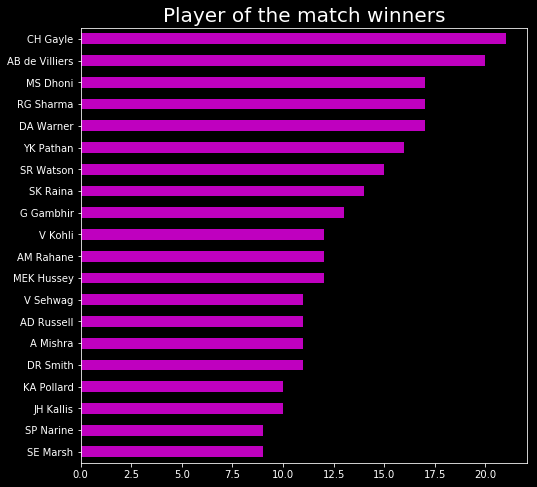

In [15]:
plt.figure(figsize=(8,8))
data["player_of_match"].value_counts().sort_values().tail(20).plot(kind = "barh",color="m")
plt.title("Player of the match winners",fontsize=20)
plt.show()

In [16]:
data["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [17]:
data["city"] = data["city"].replace("Bengaluru","Banglore")

## Top 15 ipl match cities.

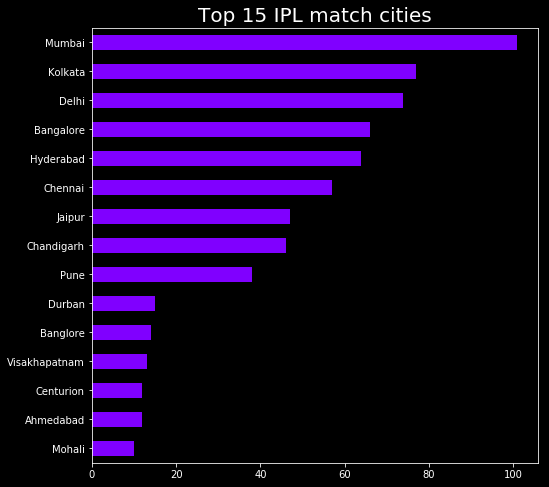

In [18]:
plt.figure(figsize=(8,8))
data["city"].value_counts().sort_values().tail(15).plot(kind = "barh",cmap = "rainbow")
plt.title("Top 15 IPL match cities",fontsize=20)
plt.show()

## Top 15 IPL match venues

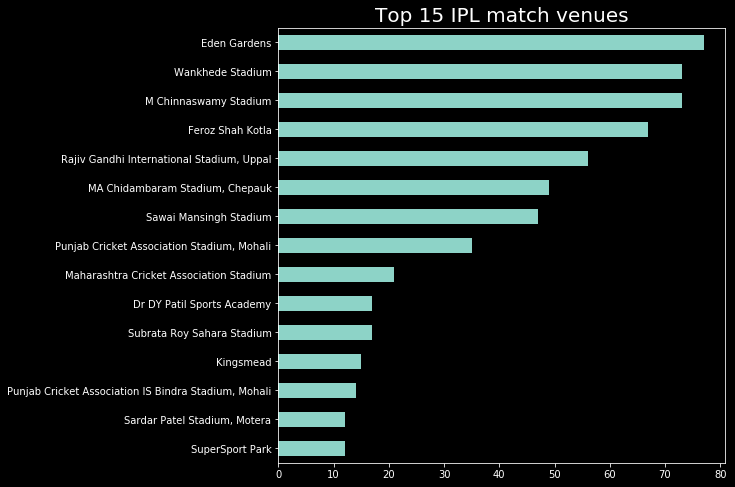

In [19]:
plt.figure(figsize=(8,8))
data["venue"].value_counts().sort_values().tail(15).plot(kind = "barh")
plt.title("Top 15 IPL match venues",fontsize=20)
plt.show()

In [20]:
mapping = {'Sunrisers Hyderabad':"SRH", 'Mumbai Indians':"MI", 'Gujarat Lions':"GL",
       'Rising Pune Supergiant':"RPS", 'Royal Challengers Bangalore':"RCB",
       'Kolkata Knight Riders':"KKR", 'Delhi Daredevils':"DC", 'Kings XI Punjab':"KXIP",
       'Chennai Super Kings':"CSK", 'Rajasthan Royals':"RR", 'Deccan Chargers':"SRH",
       'Kochi Tuskers Kerala':"KTK", 'Pune Warriors':"RPS", 'Rising Pune Supergiants':"RPS",
       'Delhi Capitals':"DC"}

In [21]:
data["team1"] = data["team1"].map(mapping)
data["team2"] = data["team2"].map(mapping)
data["toss_winner"] = data["toss_winner"].map(mapping)
data["winner"] = data["winner"].map(mapping)

In [22]:
data["date"] = pd.to_datetime(data["date"])

In [23]:
data["year"] = data["date"].dt.year
data = data.drop(columns=["date","season"])

### Total number of matches per year.

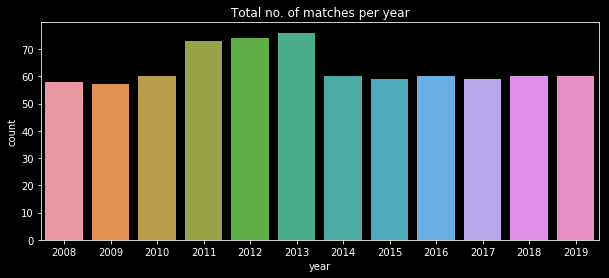

In [24]:
# Total no of matches per year.
plt.figure(figsize=(10,4))
sns.countplot(data["year"])
plt.title("Total no. of matches per year")
plt.show()

#### 2011,2012 and 2013 were the years with more matches than other years, just because there were more than 8 IPL teams from year 2011-13 and only 8 IPL teams for other years.

### Win percentage of each team.

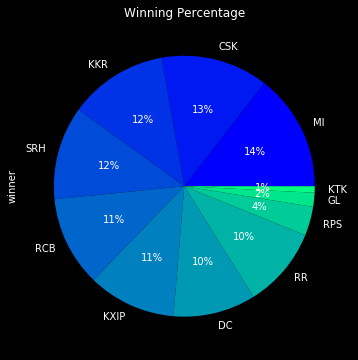

In [25]:
data["winner"].value_counts().plot(kind = "pie",title="Winning Percentage",cmap="winter",autopct='%1.0f%%',figsize=(6,6))
plt.show()

#### Here it is clear that CSK and MI are dominating over others.

## Toss Winners.

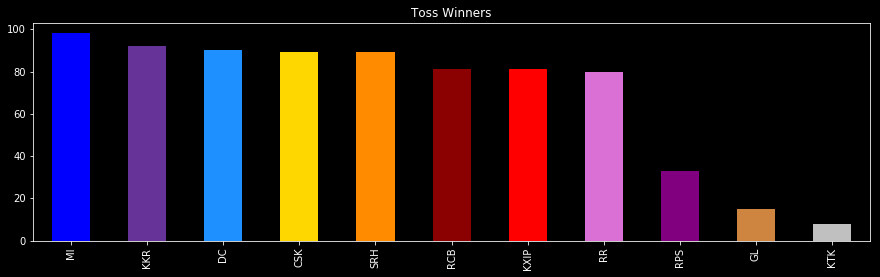

In [26]:
# Toss winners
plt.figure(figsize=(15,4))
data["toss_winner"].value_counts().plot(kind = "bar",title="Toss Winners",
                                        color=["blue","rebeccapurple","dodgerblue","gold","darkorange","darkred","red","orchid","purple","peru","silver"])

plt.show()

In [27]:
year_2008 = data[data["year"]==2008]
year_2009 = data[data["year"]==2009]
year_2010 = data[data["year"]==2010]
year_2011 = data[data["year"]==2011]
year_2012 = data[data["year"]==2012]
year_2013 = data[data["year"]==2013]
year_2014 = data[data["year"]==2014]
year_2015 = data[data["year"]==2015]
year_2016 = data[data["year"]==2016]
year_2017 = data[data["year"]==2017]
year_2018 = data[data["year"]==2018]
year_2019 = data[data["year"]==2019]

## Total wins by each team from 2008-2019.

### 2008

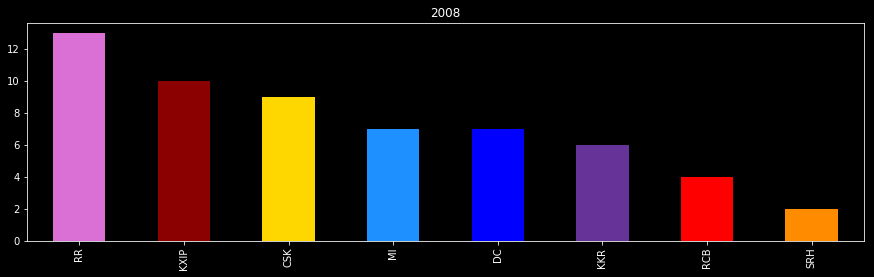

In [28]:
# Wins by teams each year.
plt.figure(figsize=(15,4))
year_2008["winner"].value_counts().plot(kind="bar",title=2008,color=["orchid","darkred","gold","dodgerblue","b","rebeccapurple","r","darkorange"])
plt.show()

### 2009

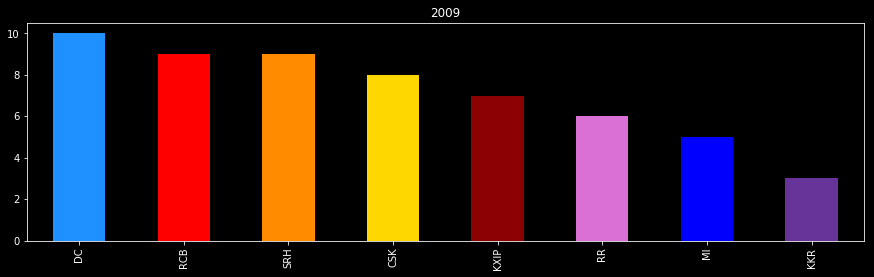

In [29]:
plt.figure(figsize=(15,4))
year_2009["winner"].value_counts().plot(kind="bar",title=2009,color=["dodgerblue","r","darkorange","gold","darkred","orchid","b","rebeccapurple"])
plt.show()

### 2010

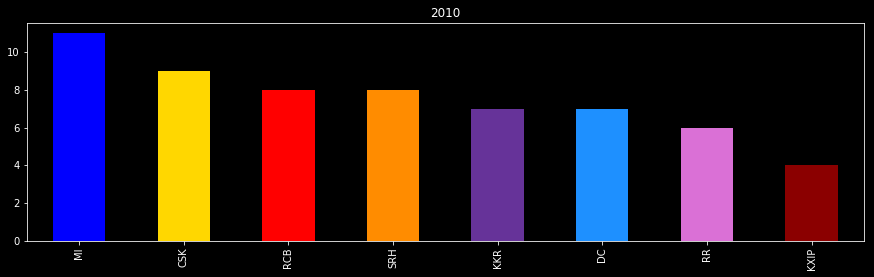

In [30]:
plt.figure(figsize=(15,4))
year_2010["winner"].value_counts().plot(kind="bar",title="2010",color=["b","gold","r","darkorange","rebeccapurple","dodgerblue","orchid","darkred"])
plt.show()

### 2011

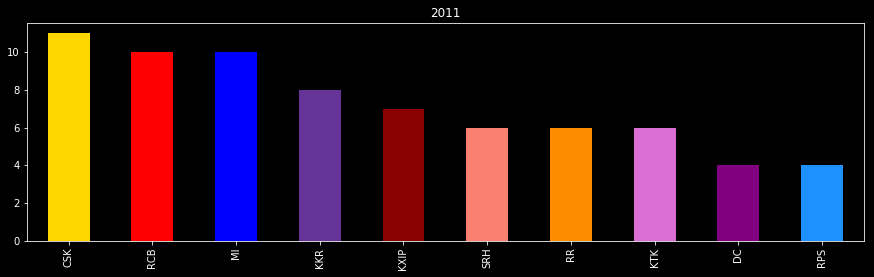

In [31]:
plt.figure(figsize=(15,4))
year_2011["winner"].value_counts().plot(kind="bar",title="2011",
                                        color=["gold","r","b","rebeccapurple","darkred","salmon","darkorange","orchid","purple","dodgerblue"])
plt.show()

### 2012

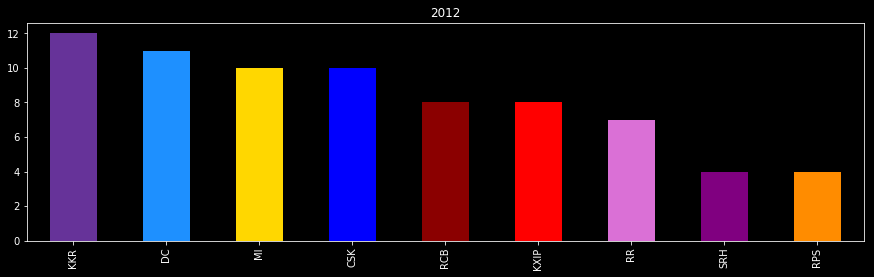

In [32]:
plt.figure(figsize=(15,4))
year_2012["winner"].value_counts().plot(kind="bar",title="2012",
                                        color=["rebeccapurple","dodgerblue","gold","b","darkred","r","orchid","purple","darkorange"])
plt.show()

### 2013

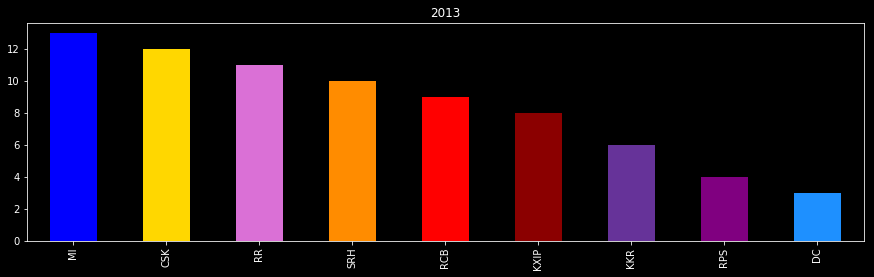

In [33]:
plt.figure(figsize=(15,4))
year_2013["winner"].value_counts().plot(kind="bar",title="2013",
                                        color=["b","gold","orchid","darkorange","r","darkred","rebeccapurple","purple","dodgerblue"])
plt.show()

### 2014

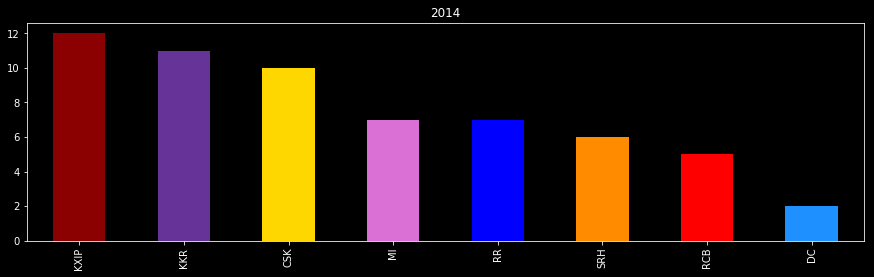

In [34]:
plt.figure(figsize=(15,4))
year_2014["winner"].value_counts().plot(kind="bar",title="2014",color=["darkred","rebeccapurple","gold","orchid","b","darkorange","r","dodgerblue"])
plt.show()

### 2015

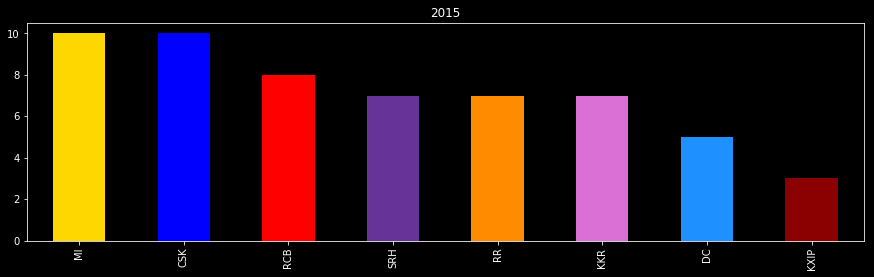

In [35]:
plt.figure(figsize=(15,4))
year_2015["winner"].value_counts().plot(kind="bar",title="2015",color=["gold","b","r","rebeccapurple","darkorange","orchid","dodgerblue","darkred"])
plt.show()

### 2016

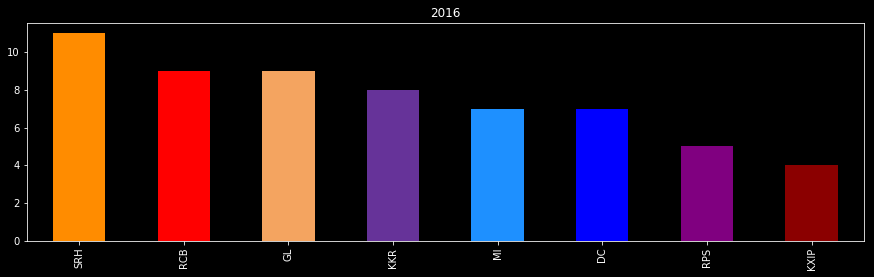

In [36]:
plt.figure(figsize=(15,4))
year_2016["winner"].value_counts().plot(kind="bar",title="2016",color=["darkorange","r","sandybrown","rebeccapurple","dodgerblue","b","purple","darkred"])
plt.show()

### 2017

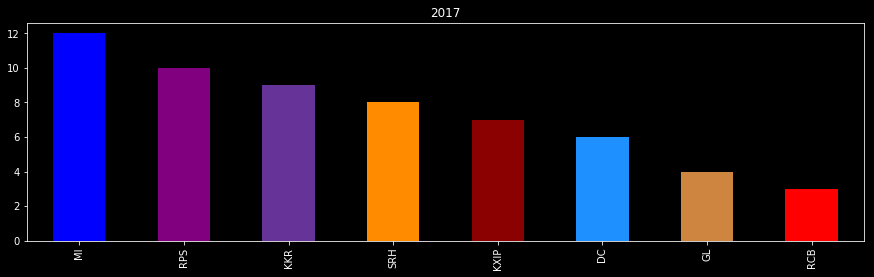

In [37]:
plt.figure(figsize=(15,4))
year_2017["winner"].value_counts().plot(kind="bar",title="2017",color=["b","purple","rebeccapurple","darkorange","darkred","dodgerblue","peru","r"])
plt.show()

### 2018

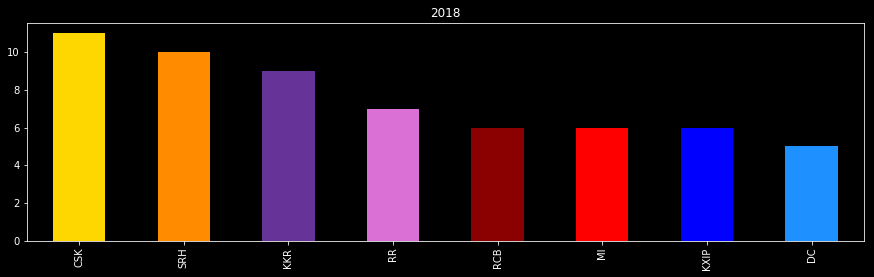

In [38]:
plt.figure(figsize=(15,4))
year_2018["winner"].value_counts().plot(kind="bar",title="2018",color=["gold","darkorange","rebeccapurple","orchid","darkred","r","b","dodgerblue"])
plt.show()

### 2019

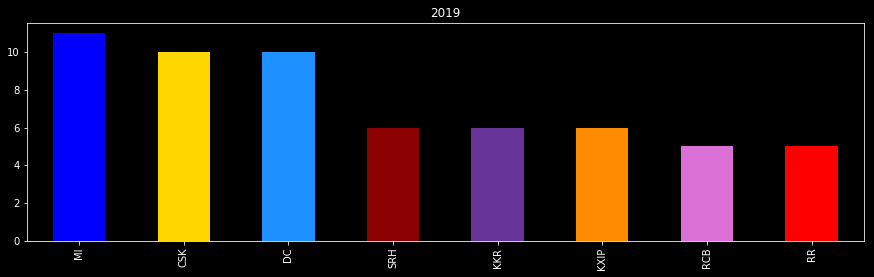

In [39]:
plt.figure(figsize=(15,4))
year_2019["winner"].value_counts().plot(kind="bar",title="2019",color=["b","gold","dodgerblue","darkred","rebeccapurple","darkorange","orchid","r"])
plt.show()

### Descision after winning toss.

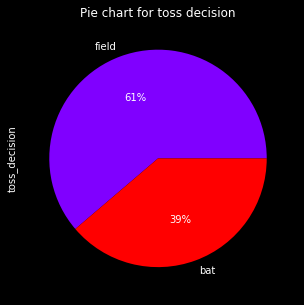

In [40]:
data["toss_decision"].value_counts().plot(kind="pie",cmap="rainbow",autopct='%1.0f%%',title="Pie chart for toss decision",figsize=(5,5))
plt.show()

#### Most of the teams loves to chase the target and choose to field after winning toss.

In [41]:
data["win_toss_to_game"] = (data["toss_winner"]==data["winner"])

In [42]:
data["win_toss_to_game"] = np.where(data["win_toss_to_game"]==True,"Win","Lose")

### Win or loss after winning toss.

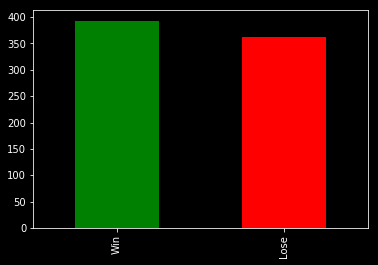

In [43]:
# Plotting bar graph for teams which wins toss and wins match or not.
data["win_toss_to_game"].value_counts().plot(kind="bar",color=["g","r"])
plt.show()

#### However the toss did not impact on the result that much. The win and loss of match  percent after winning the toss in close enough.

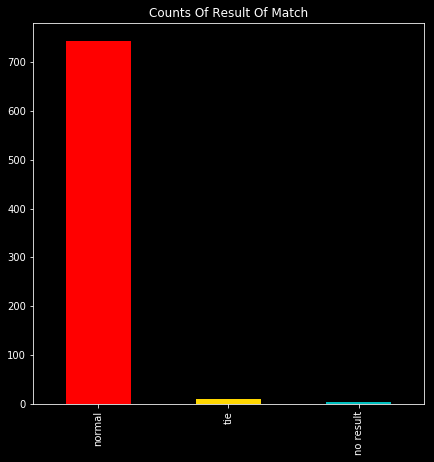

In [44]:
data["result"].value_counts().plot(kind="bar",title="Counts Of Result Of Match",color=["r","gold","c"],figsize=(7,7))
plt.show()

#### More than 95% matches are ended through the normal way.

### Checking how many matchs are ended through Duckworth-Lewis-Stern method

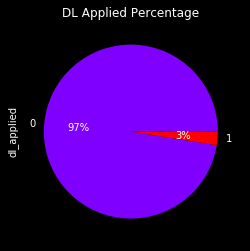

In [45]:
# Checking how many matchs are ended through Duckworth-Lewis-Stern method
data["dl_applied"].value_counts().plot(kind="pie",title="DL Applied Percentage",autopct='%1.0f%%',cmap="rainbow")
plt.show()

In [46]:
data["win_by_run"] = np.where(data["win_by_runs"]==0,0,1)

In [47]:
data["win_by_run"].value_counts()

0    419
1    337
Name: win_by_run, dtype: int64

In [48]:
team = data["team1"].unique().tolist()

In [49]:
teams = []
wins = []
for t in team:
    rs_df = data.loc[data['winner'] == t] 
    wins.append(rs_df["win_by_run"].value_counts())
    teams.append(t)

In [50]:
wins

[1    48
 0    39
 Name: win_by_run, dtype: int64, 1    57
 0    52
 Name: win_by_run, dtype: int64, 0    12
 1     1
 Name: win_by_run, dtype: int64, 0    14
 1    13
 Name: win_by_run, dtype: int64, 0    49
 1    35
 Name: win_by_run, dtype: int64, 0    56
 1    36
 Name: win_by_run, dtype: int64, 0    49
 1    28
 Name: win_by_run, dtype: int64, 0    44
 1    38
 Name: win_by_run, dtype: int64, 1    52
 0    48
 Name: win_by_run, dtype: int64, 0    48
 1    27
 Name: win_by_run, dtype: int64, 0    4
 1    2
 Name: win_by_run, dtype: int64]

In [51]:
wins_by_runs = [48,57,1,13,35,36,28,38,52,27,2]
wins_by_wickets = [39,52,12,14,49,56,49,44,48,48,4]

## Wins while Defending.

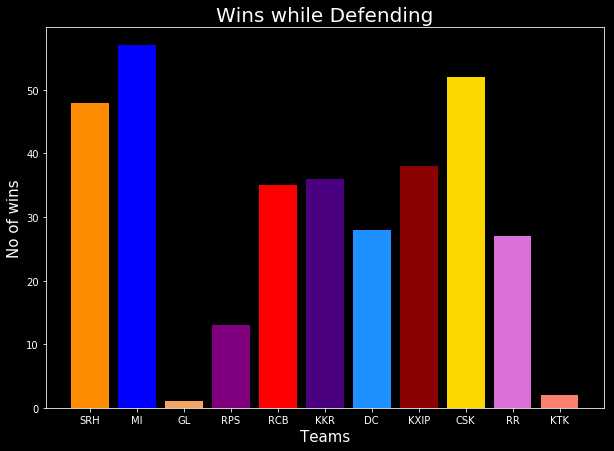

In [52]:
#Plotting bar chart for number of matches succesfully defended by team
plt.figure(figsize=(10,7))
plt.title("Wins while Defending",fontsize=20)
plt.bar(teams,wins_by_runs,color=["darkorange","b","sandybrown","purple","r","indigo","dodgerblue","darkred","gold","orchid","salmon"])
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

#### MI , CSK and SRH defended their targets which means they have good bowling attack.

## Wins while Chasing.

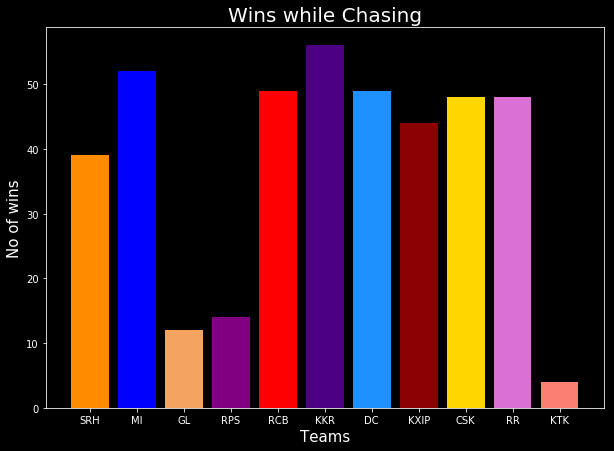

In [53]:
#Plotting bar chart for number of matches succesfully chased by team.
plt.figure(figsize=(10,7))
plt.title("Wins while Chasing",fontsize=20)
plt.bar(teams,wins_by_wickets,color=["darkorange","b","sandybrown","purple","r","indigo","dodgerblue","darkred","gold","orchid","salmon"])
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

#### On other hand KKR and MI chased the targets most.

In [54]:
tt = data["team1"].unique().tolist()

## Plotting pie chart for head to head win % by each team.

# CSK

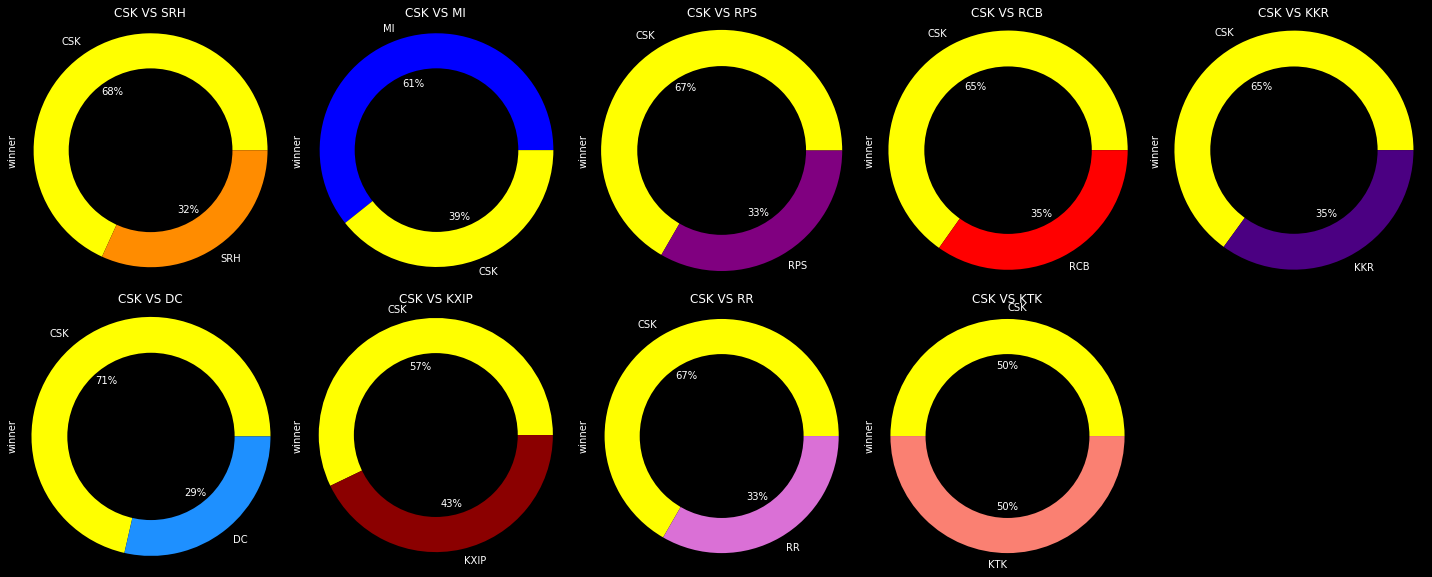

In [55]:
#CSK
z = 1
c = 1
colors = ["darkorange","b","purple","r","indigo","dodgerblue","darkred","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="CSK":
        inx = data.loc[((data["team1"] == "CSK") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "CSK")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "CSK":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "yellow"
                b = colors[x%10]
                labels = ["CSK",y]
            else:
                a,b = colors[x%10],"yellow"
                labels = [y,"CSK"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",autopct='%1.0f%%',colors = [a,b],labels=labels)
            plt.title("CSK VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
                #plt.show()
            z = z+1
            c = c+1
            x = x+1    

# MI

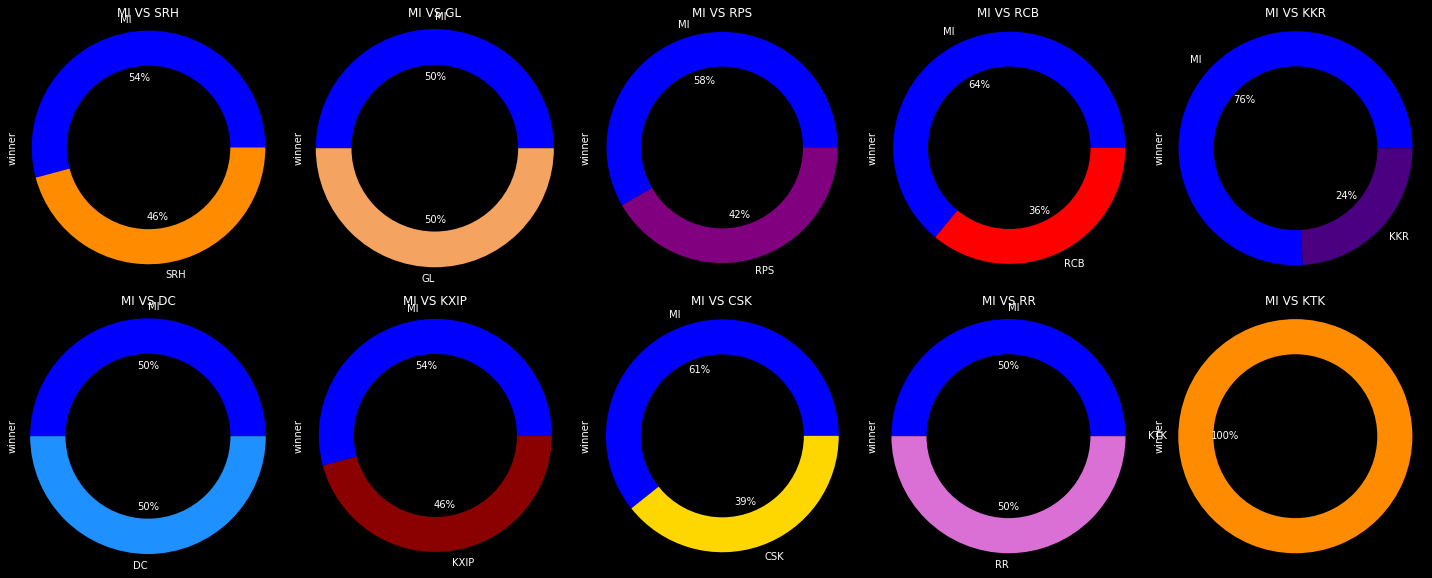

In [56]:
# MI
z = 1
c = 1
colors = ["darkorange","sandybrown","purple","r","indigo","dodgerblue","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="MI":
        inx = data.loc[((data["team1"] == "MI") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "MI")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "MI":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "b"
                b = colors[x%10]
                labels = ["MI",y]
            else:
                a,b = colors[x%9],"b"
                labels = [y,"MI"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",autopct='%1.0f%%',labels=labels,colors = [a,b])
            plt.title("MI VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# RCB

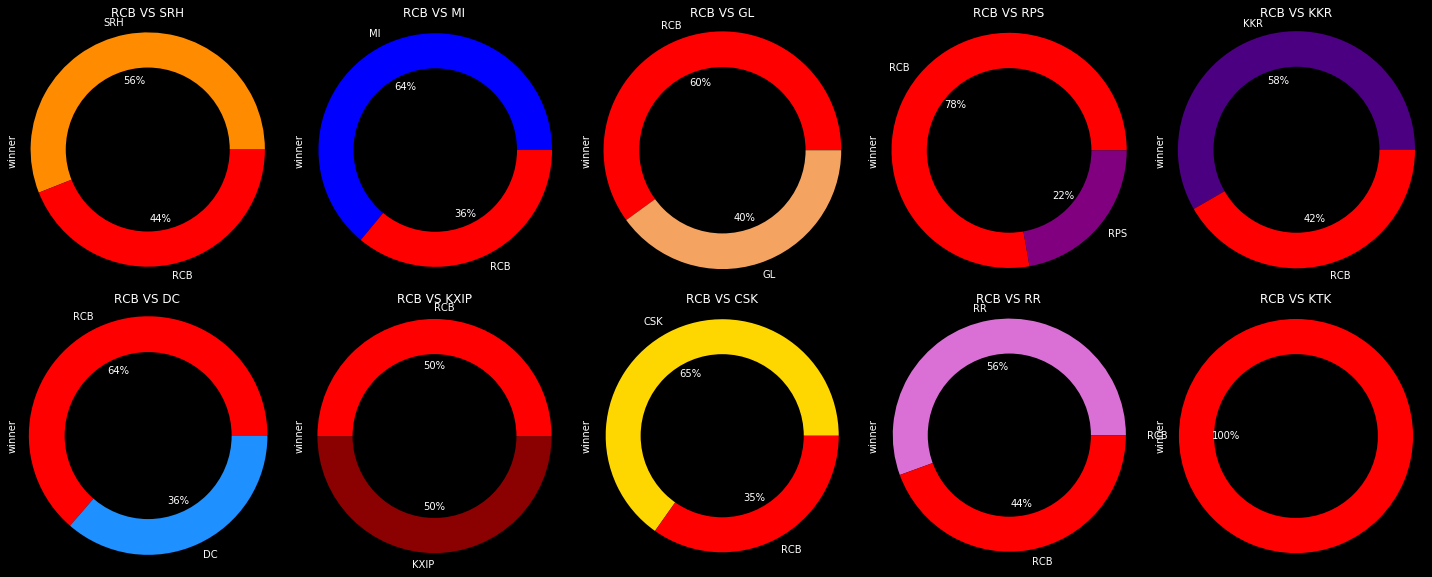

In [57]:
#RCB
z = 1
c = 1
colors = ["darkorange","b","sandybrown","purple","indigo","dodgerblue","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="RCB":
        inx = data.loc[((data["team1"] == "RCB") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "RCB")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "RCB":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "r"
                b = colors[x%10]
                labels = ["RCB",y]
            else:
                a,b = colors[x%9],"r"
                labels = [y,"RCB"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("RCB VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# KKR

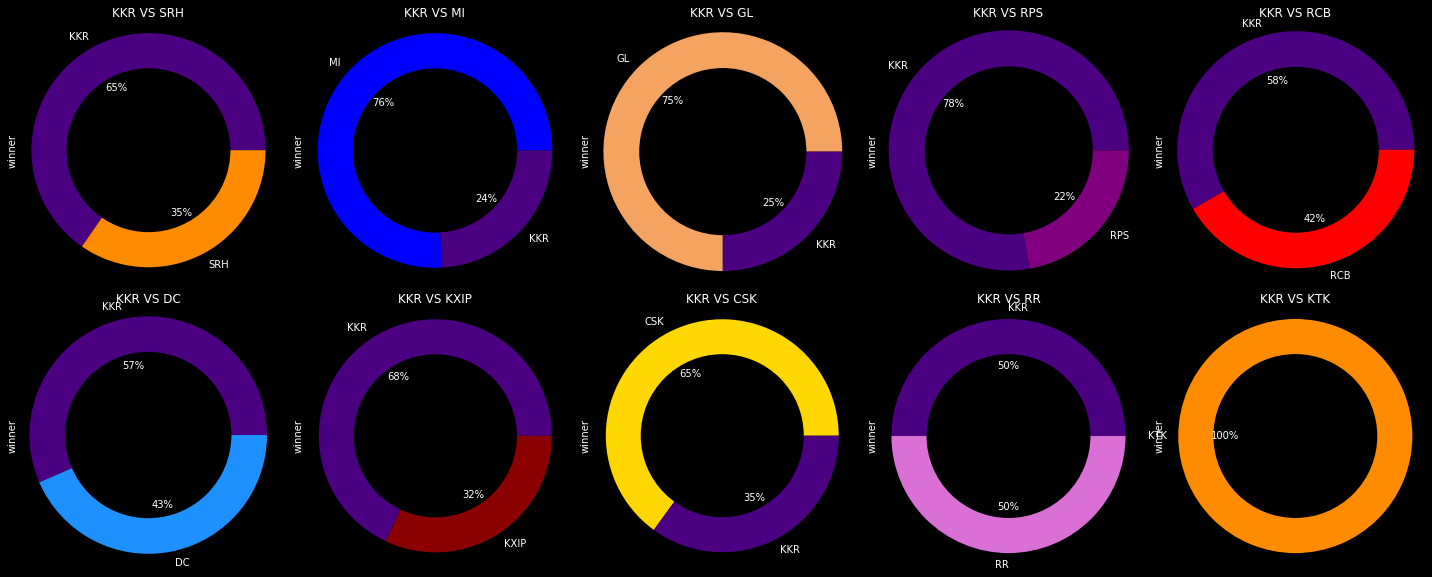

In [58]:
#KKR
z = 1
c = 1
colors = ["darkorange","b","sandybrown","purple","r","dodgerblue","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="KKR":
        inx = data.loc[((data["team1"] == "KKR") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "KKR")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "KKR":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "indigo"
                b = colors[x%10]
                labels = ["KKR",y]
            else:
                a,b = colors[x%9],"indigo"
                labels = [y,"KKR"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("KKR VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# SRH

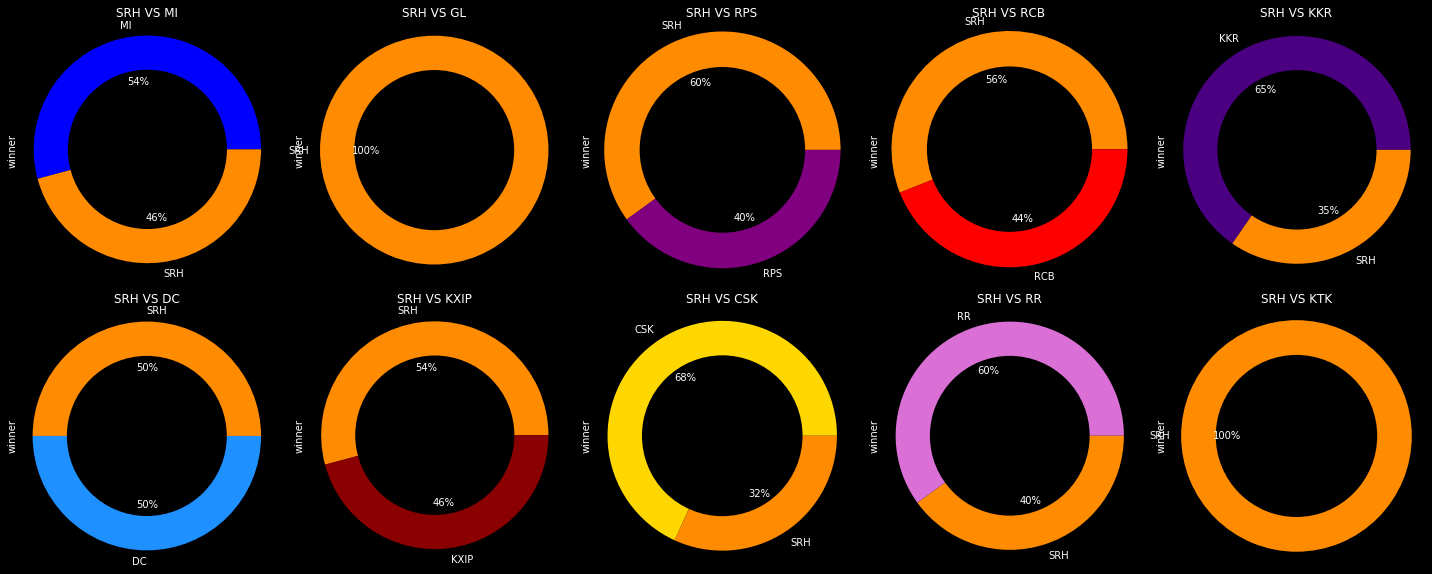

In [59]:
# SRH
z = 1
c = 1
colors = ["b","sandybrown","purple","r","indigo","dodgerblue","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="SRH":
        inx = data.loc[((data["team1"] == "SRH") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "SRH")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "SRH":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "darkorange"
                b = colors[x%10]
                labels = ["SRH",y]
            else:
                a,b = colors[x%9],"darkorange"
                labels = [y,"SRH"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("SRH VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# GL

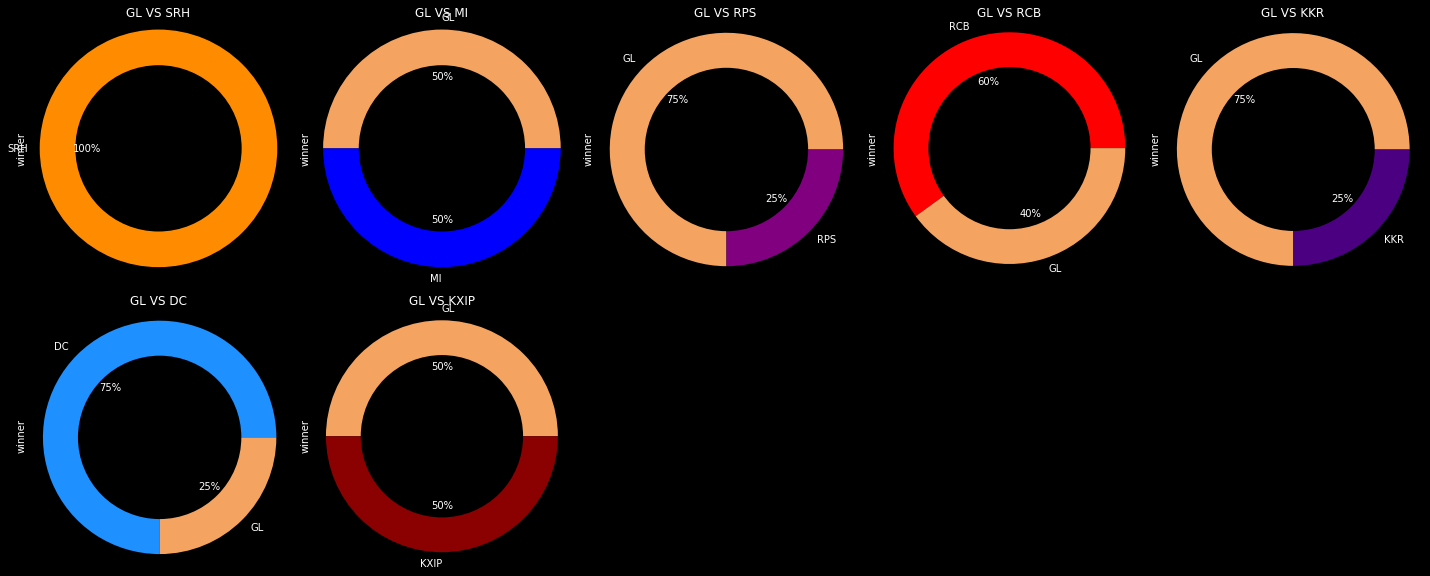

In [60]:
# GL
z = 1
c = 1
colors = ["darkorange","b","purple","r","indigo","dodgerblue","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="GL":
        inx = data.loc[((data["team1"] == "GL") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "GL")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "GL":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "sandybrown"
                b = colors[x%10]
                labels = ["GL",y]
            else:
                a,b = colors[x%9],"sandybrown"
                labels = [y,"GL"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("GL VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# RPS

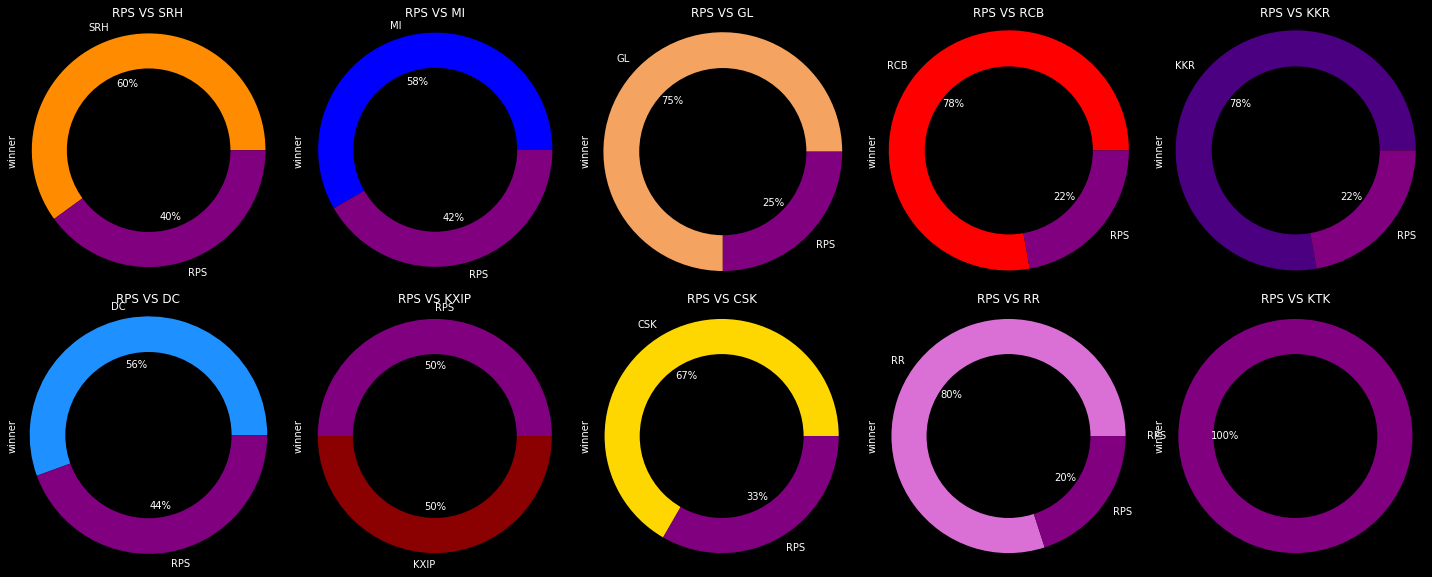

In [61]:
# RPS
z = 1
c = 1
colors = ["darkorange","b","sandybrown","r","indigo","dodgerblue","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="RPS":
        inx = data.loc[((data["team1"] == "RPS") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "RPS")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "RPS":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "purple"
                b = colors[x%10]
                labels = ["RPS",y]
            else:
                a,b = colors[x%9],"purple"
                labels = [y,"RPS"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("RPS VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# DC

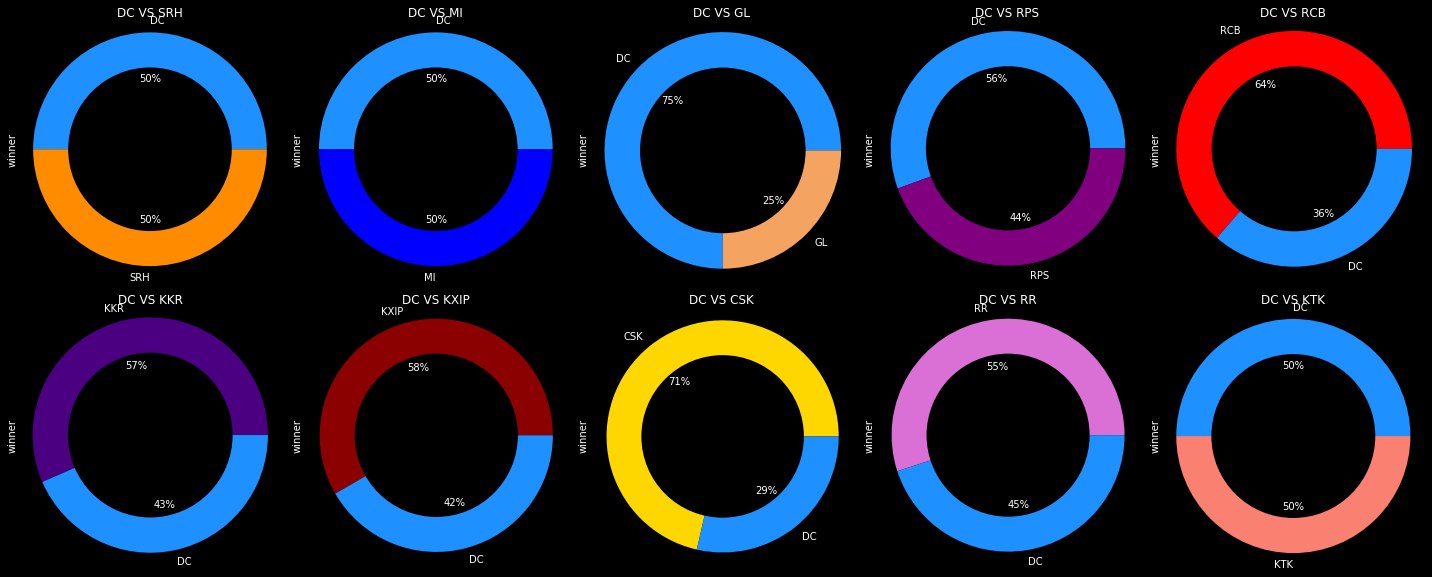

In [62]:
# DC
z = 1
c = 1
colors = ["darkorange","b","sandybrown","purple","r","indigo","darkred","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="DC":
        inx = data.loc[((data["team1"] == "DC") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "DC")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "DC":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "dodgerblue"
                b = colors[x%10]
                labels = ["DC",y]
            else:
                a,b = colors[x%9],"dodgerblue"
                labels = [y,"DC"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("DC VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# KXIP

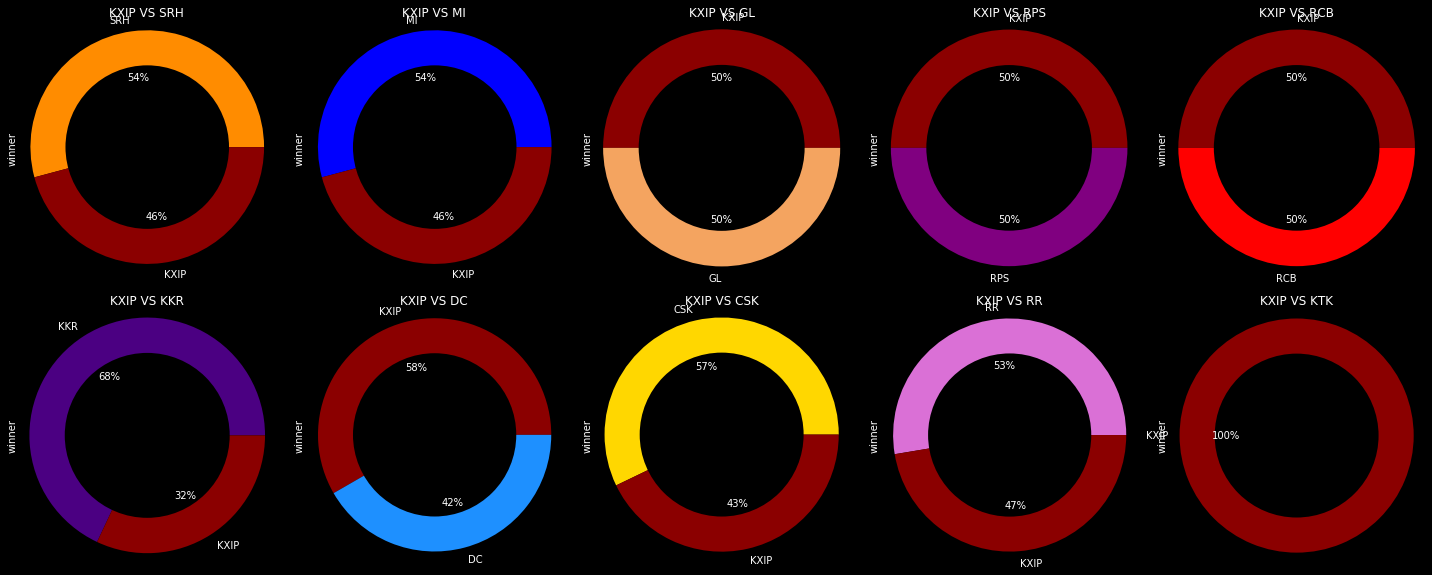

In [63]:
# KXIP
z = 1
c = 1
colors = ["darkorange","b","sandybrown","purple","r","indigo","dodgerblue","gold","orchid","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="KXIP":
        inx = data.loc[((data["team1"] == "KXIP") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "KXIP")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "KXIP":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "darkred"
                b = colors[x%10]
                labels = ["KXIP",y]
            else:
                a,b = colors[x%9],"darkred"
                labels = [y,"KXIP"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("KXIP VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# RR

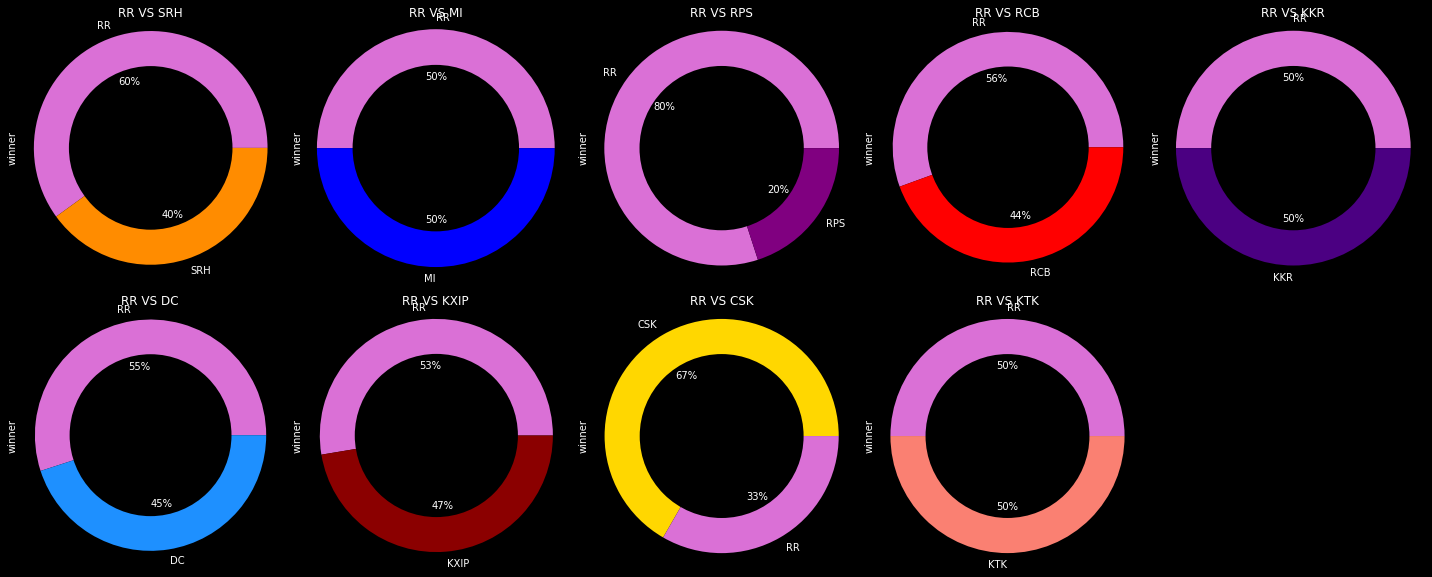

In [64]:
# RR
z = 1
c = 1
colors = ["darkorange","b","purple","r","indigo","dodgerblue","darkred","gold","salmon"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="RR":
        inx = data.loc[((data["team1"] == "RR") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "RR")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "RR":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "orchid"
                b = colors[x%10]
                labels = ["RR",y]
            else:
                a,b = colors[x%9],"orchid"
                labels = [y,"RR"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",autopct='%1.0f%%',colors = [a,b],labels=labels)
            plt.title("RR VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

# KTK

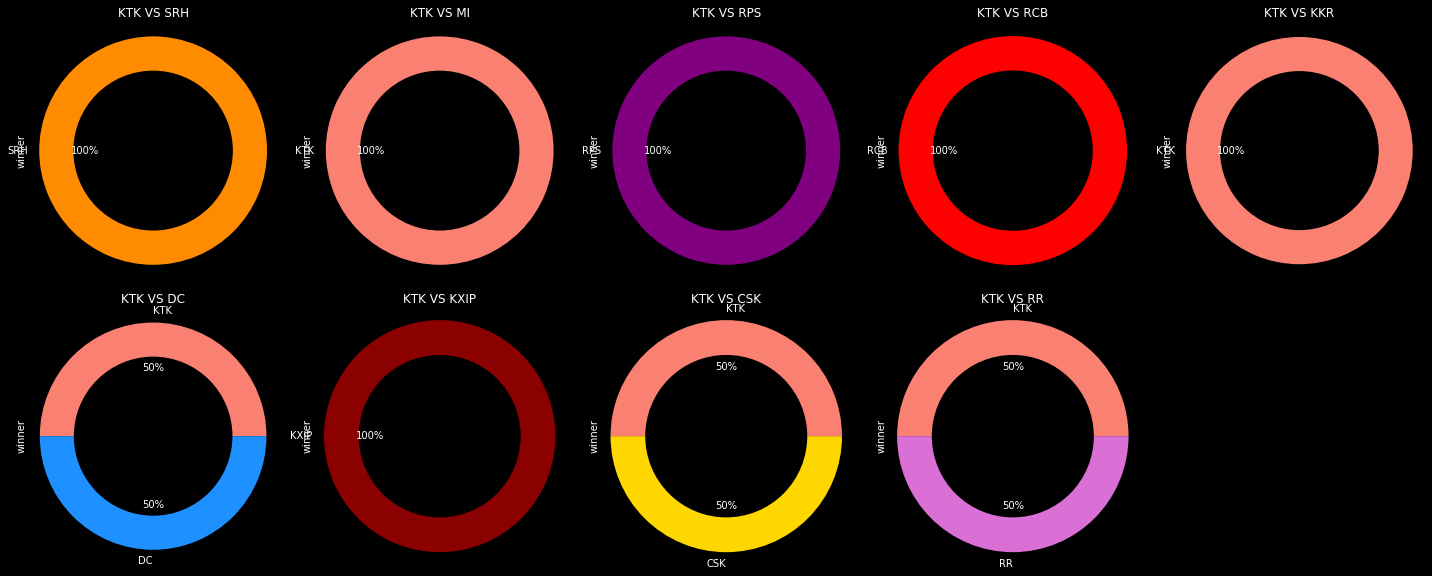

In [65]:
# KTK
z = 1
c = 1
colors = ["darkorange","b","purple","r","indigo","dodgerblue","darkred","gold","orchid"]
x = 0
plt.figure(figsize=(20,12))
for y in tt:
    if y!="KTK":
        inx = data.loc[((data["team1"] == "KTK") & (data["team2"] == y)) | ((data["team1"] == y) & (data["team2"] == "KTK")),"winner"]
        if len(inx) > 0:
            a = 0
            b = 0
            for i in inx.values:
                if i == "KTK":
                    a = a+1
                else:
                    b = b+1
            if a>=b:
                a = "salmon"
                b = colors[x%9]
                labels = ["KTK",y]
            else:
                a,b = colors[x%8],"salmon"
                labels = [y,"KTK"]
            ax1 = plt.subplot(3,5,c)
            inx.value_counts().plot(kind="pie",labels=labels,autopct='%1.0f%%',colors = [a,b])
            plt.title("KTK VS {}".format(y))
            centre_circle = plt.Circle((0,0),0.70,fc='black')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            ax1.axis('equal')  
            plt.tight_layout()
            z = z+1
            c = c+1
            x = x+1    

In [69]:
df = pd.read_csv("deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [70]:
df.shape

(179078, 21)

In [71]:
df["bowler_conceded_runs"] = df["total_runs"] - (df["bye_runs"]+df["legbye_runs"])

## Total Balls Faced by Players.

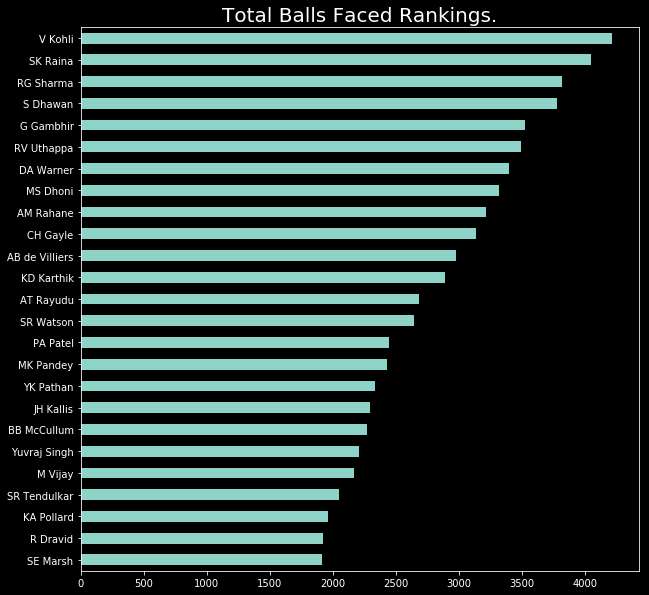

In [72]:
plt.figure(figsize=(10,10))
df["batsman"].value_counts().sort_values().tail(25).plot(kind = "barh")
plt.title("Total Balls Faced Rankings.",fontsize=20)
plt.show()

## Total Balls Bowled by Bowlers.

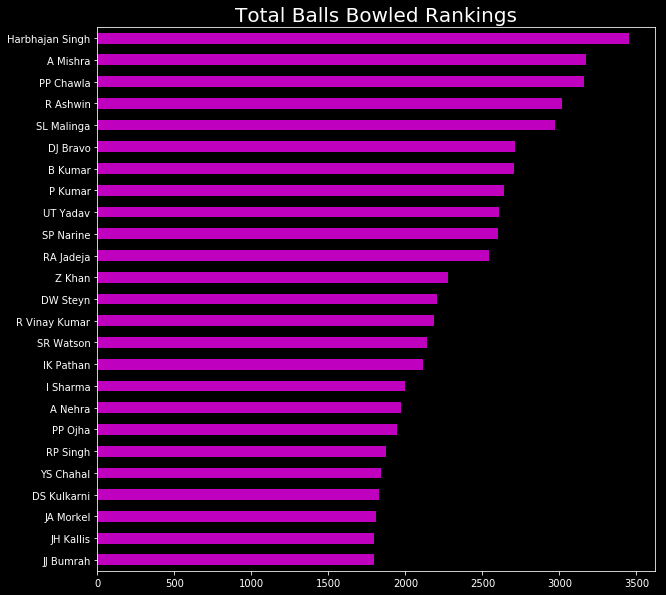

In [73]:
plt.figure(figsize=(10,10))
df["bowler"].value_counts().sort_values().tail(25).plot(kind = "barh",color="m")
plt.title("Total Balls Bowled Rankings",fontsize=20)
plt.show()

## Total wides by individual.

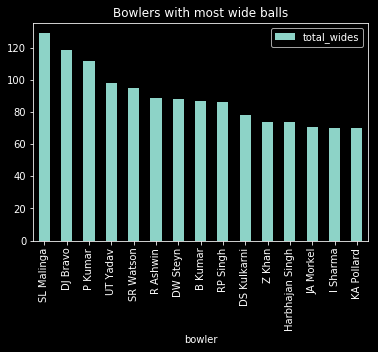

In [74]:
d = df.loc[df['wide_runs']>0, ['bowler', 'wide_runs']].copy()
d['total_wides'] = d.groupby('bowler')['wide_runs'].transform('count')
d = d.drop('wide_runs', axis=1).drop_duplicates().reset_index(drop=True).sort_values('total_wides',ascending=False).head(15)
d.plot(kind='bar', x='bowler', y='total_wides')
plt.title('Bowlers with most wide balls')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 22 columns):
match_id                179078 non-null int64
inning                  179078 non-null int64
batting_team            179078 non-null object
bowling_team            179078 non-null object
over                    179078 non-null int64
ball                    179078 non-null int64
batsman                 179078 non-null object
non_striker             179078 non-null object
bowler                  179078 non-null object
is_super_over           179078 non-null int64
wide_runs               179078 non-null int64
bye_runs                179078 non-null int64
legbye_runs             179078 non-null int64
noball_runs             179078 non-null int64
penalty_runs            179078 non-null int64
batsman_runs            179078 non-null int64
extra_runs              179078 non-null int64
total_runs              179078 non-null int64
player_dismissed        8834 non-null object
dismissal_k

## Total Runs Scored by Individual.

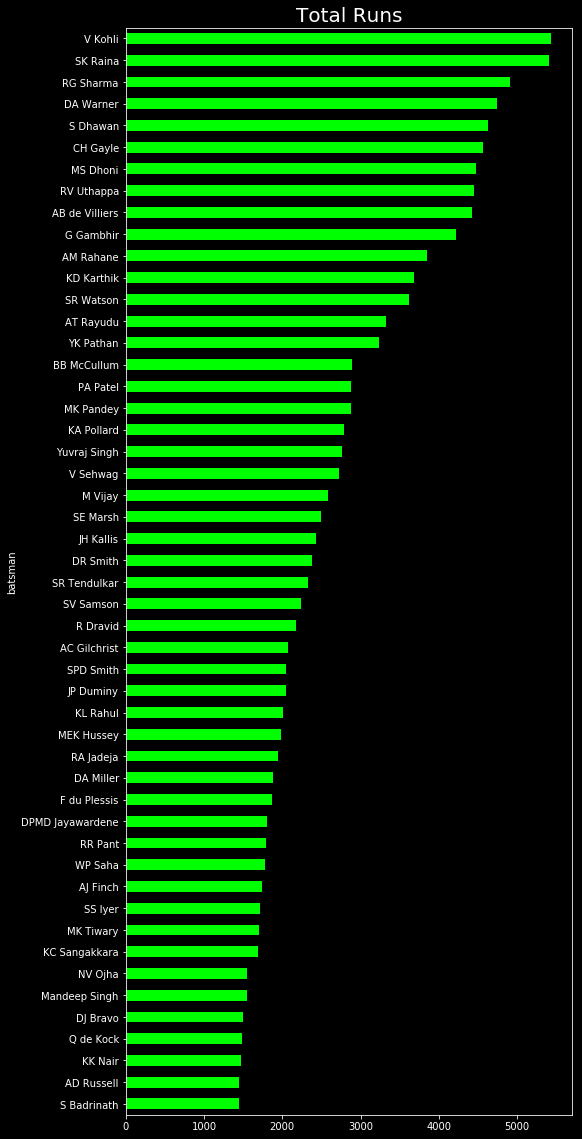

In [76]:
plt.figure(figsize=(8,20))
df["batsman_runs"].groupby(by=df["batsman"]).sum().sort_values().tail(50).plot(kind = "barh",color = "lime")
plt.title("Total Runs",fontsize=20)
plt.show()

## Total Runs Conceded by Individual.

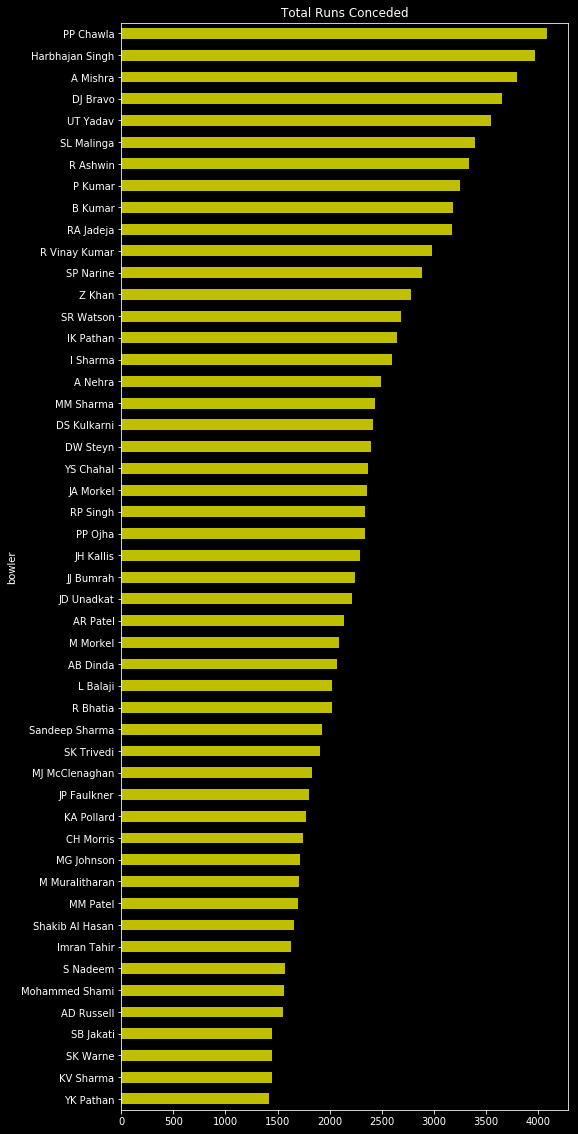

In [77]:
plt.figure(figsize=(8,20))
df["bowler_conceded_runs"].groupby(by=df["bowler"]).sum().sort_values().tail(50).plot(kind = "barh",color = "y")
plt.title("Total Runs Conceded")
plt.show()

In [78]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [79]:
mapping = {'Sunrisers Hyderabad':"SRH", 'Royal Challengers Bangalore':"RCB",
       'Mumbai Indians':"MI", 'Rising Pune Supergiant':"RPS", 'Gujarat Lions':"GL",
       'Kolkata Knight Riders':"KKR", 'Kings XI Punjab':"KXIP", 'Delhi Daredevils':"DC",
       'Chennai Super Kings':"CSK", 'Rajasthan Royals':"RR", 'Deccan Chargers':"SRH",
       'Kochi Tuskers Kerala':"KTK", 'Pune Warriors':"PW", 'Rising Pune Supergiants':"RPS",
       'Delhi Capitals':"DC"}
df["batting_team"] = df["batting_team"].map(mapping)
df["bowling_team"] = df["bowling_team"].map(mapping)

# Top run scorers for each team.

Most Runs Scored For Particular Teams


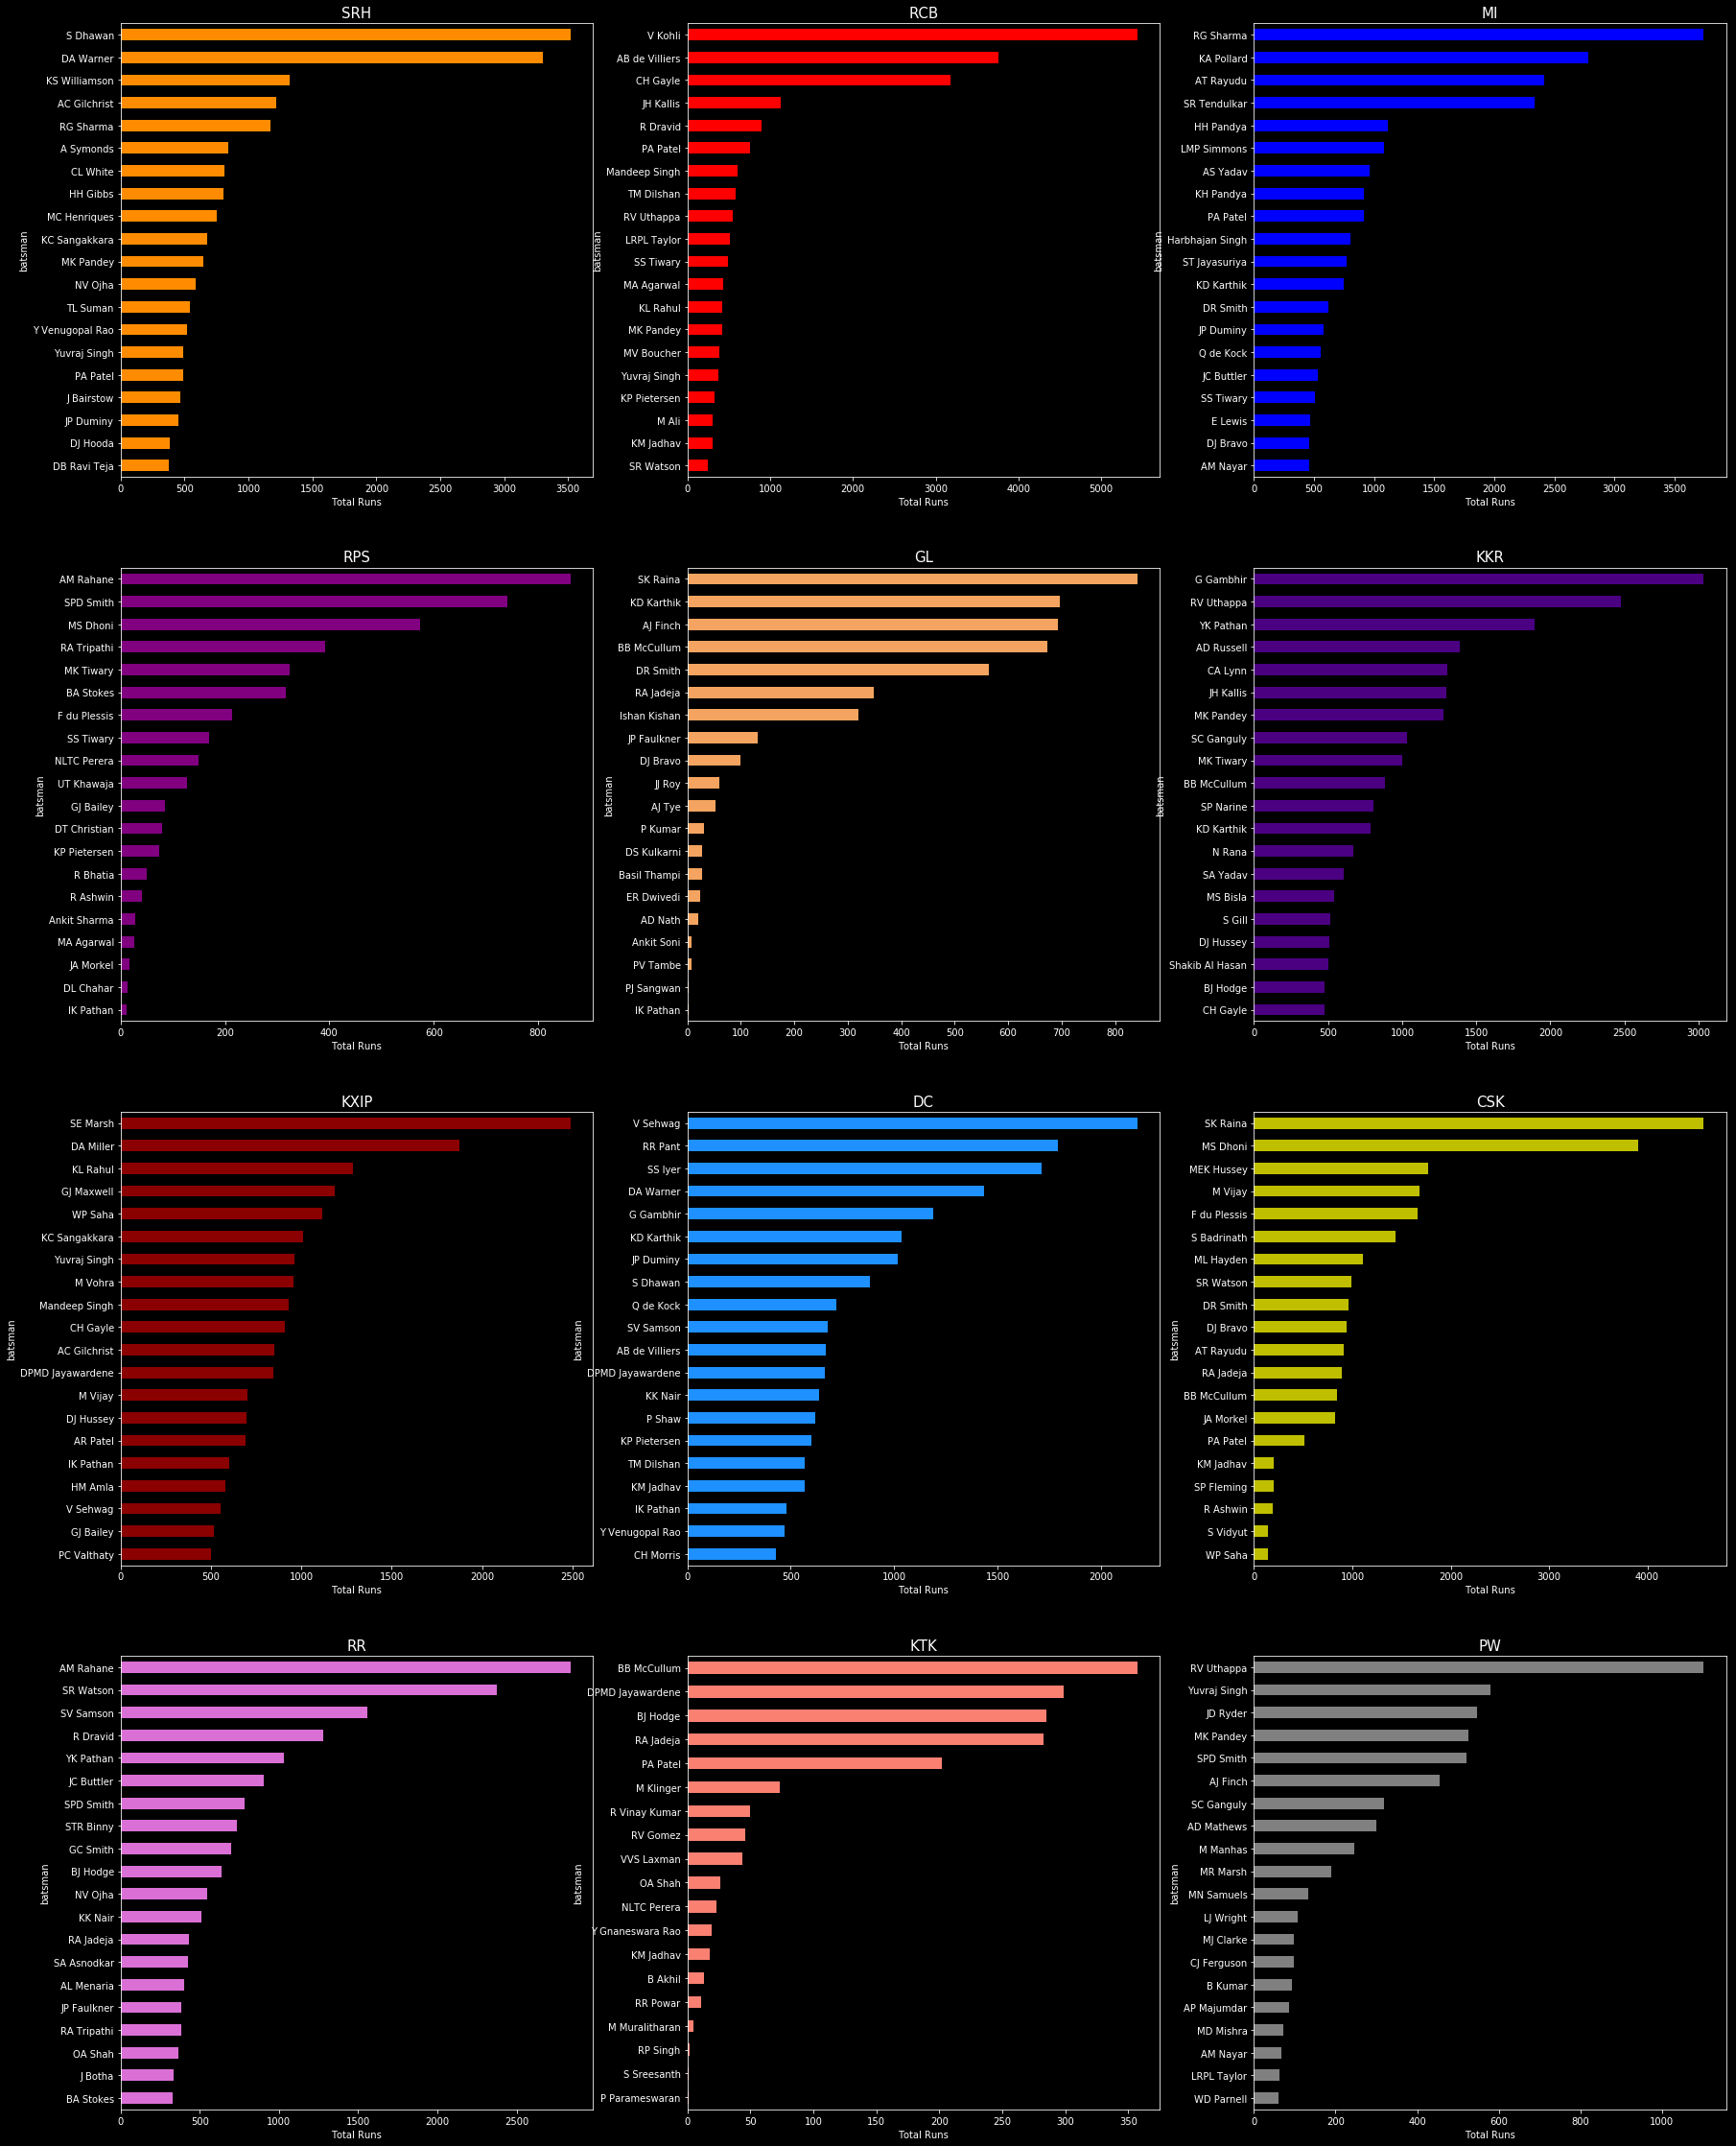

In [80]:
print("Most Runs Scored For Particular Teams")
cl = ["darkorange","r","b","purple","sandybrown","indigo","darkred","dodgerblue","y","orchid","salmon","grey"]
x = 0
c = 1
plt.figure(figsize=(30,40))
for i in df["batting_team"].unique():
    team = df[df["batting_team"]==i]
    plt.subplot(4,3,c)
    team["batsman_runs"].groupby(by=team["batsman"]).sum().sort_values().tail(20).plot(kind = "barh",color = cl[x%12])
    plt.title("{}".format(i),fontsize=15)
    plt.xlabel("Total Runs")
    c = c+1
    x = x+1

In [81]:
death_overs = df.loc[(df["over"]>16)]
powerplay = df.loc[(df["over"])<=6]

## Total number of times players dismissed

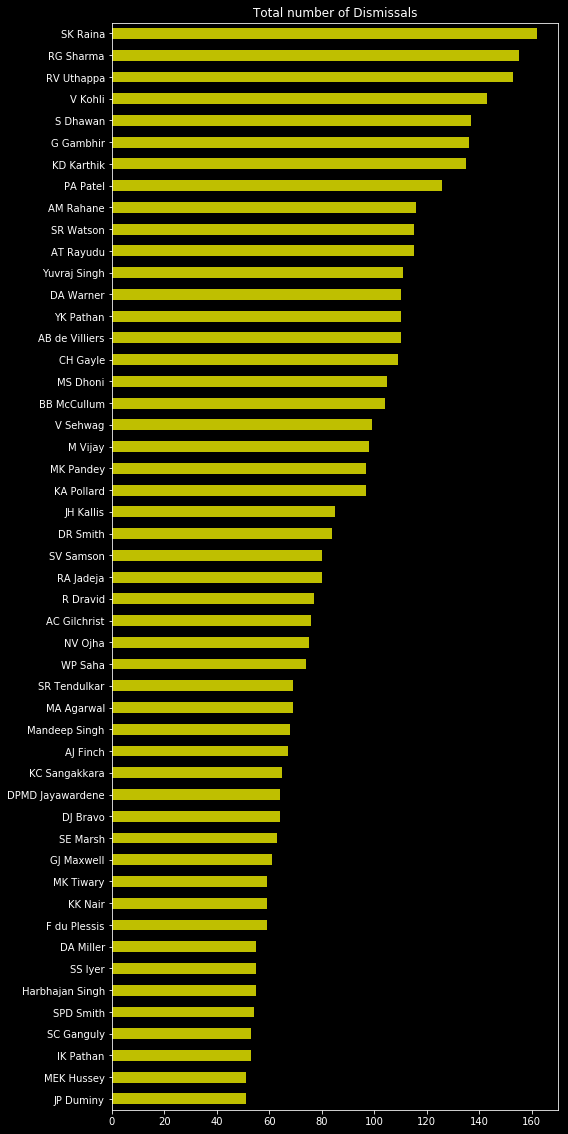

In [82]:
plt.figure(figsize=(8,20))
diss = df[df["player_dismissed"]!=np.nan]
diss["player_dismissed"].value_counts().sort_values().tail(50).plot(kind = "barh",color = "y")
plt.title("Total number of Dismissals")
plt.show()

## Total Runs scored by teams.

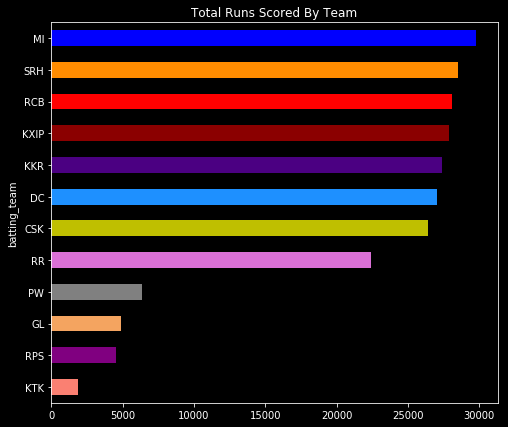

In [83]:
colors = ["salmon","purple","sandybrown","grey","orchid","y","dodgerblue","indigo","darkred","r","darkorange","b"]
plt.figure(figsize=(8,7))
df["total_runs"].groupby(by = df["batting_team"]).sum().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Runs Scored By Team")
plt.show()

## Total Runs scored by teams in powerplay.

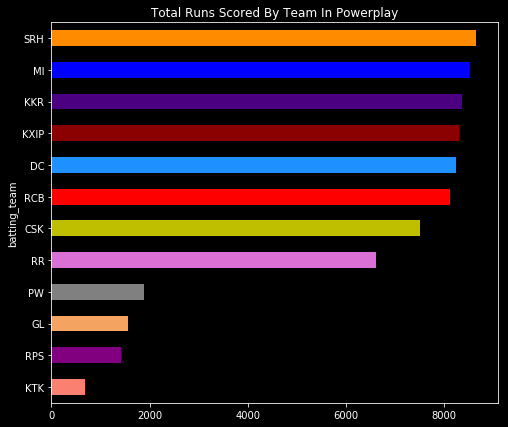

In [84]:
colors = ["salmon","purple","sandybrown","grey","orchid","y","r","dodgerblue","darkred","indigo","b","darkorange"]
plt.figure(figsize=(8,7))
powerplay["total_runs"].groupby(by = powerplay["batting_team"]).sum().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Runs Scored By Team In Powerplay")
plt.show()

## Total Runs scored by teams in Death Overs.

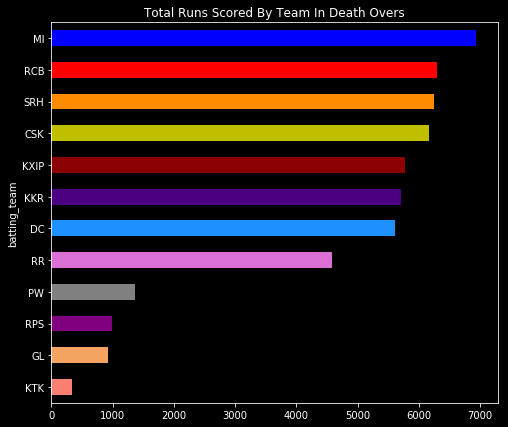

In [85]:
colors = ["salmon","sandybrown","purple","grey","orchid","dodgerblue","indigo","darkred","y","darkorange","r","b"]
plt.figure(figsize=(8,7))
death_overs["total_runs"].groupby(by = death_overs["batting_team"]).sum().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Runs Scored By Team In Death Overs")
plt.show()

## Total Runs conceded by teams.

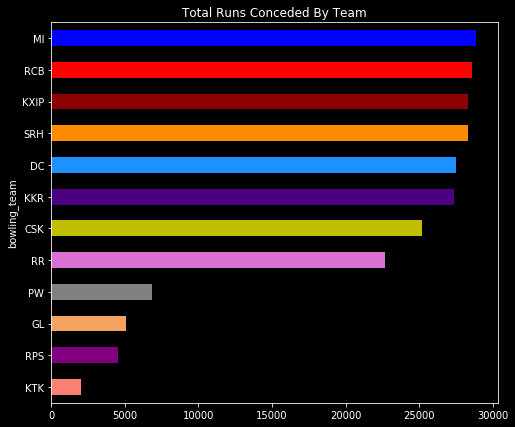

In [86]:
colors = ["salmon","purple","sandybrown","grey","orchid","y","indigo","dodgerblue","darkorange","darkred","r","b"]
plt.figure(figsize=(8,7))
df["total_runs"].groupby(by = df["bowling_team"]).sum().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Runs Conceded By Team")
plt.show()

## Total Extras conceded by teams.

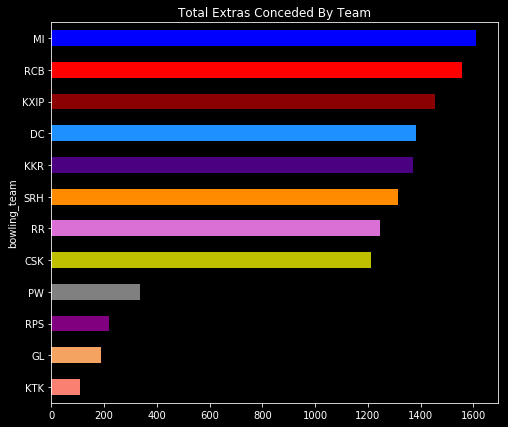

In [87]:
colors = ["salmon","sandybrown","purple","grey","y","orchid","darkorange","indigo","dodgerblue","darkred","r","b"]
plt.figure(figsize=(8,7))
df["extra_runs"].groupby(by = df["bowling_team"]).sum().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Extras Conceded By Team")
plt.show()

In [88]:
df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [89]:
catches = df.loc[(df["dismissal_kind"] == "caught")  | (df["dismissal_kind"] == "caught and bowled")]
wickets = df.loc[(df["dismissal_kind"] == "caught") | (df["dismissal_kind"] == "caught and bowled") | 
                 (df["dismissal_kind"] == "bowled") | (df["dismissal_kind"] == "lbw") |
                (df["dismissal_kind"] == "stumped") | (df["dismissal_kind"] == "hit wicket")]
run_out = df.loc[(df["dismissal_kind"] == "run out")]
stumpings = df.loc[(df["dismissal_kind"] == "stumped")]

## Most Catches by Individual.

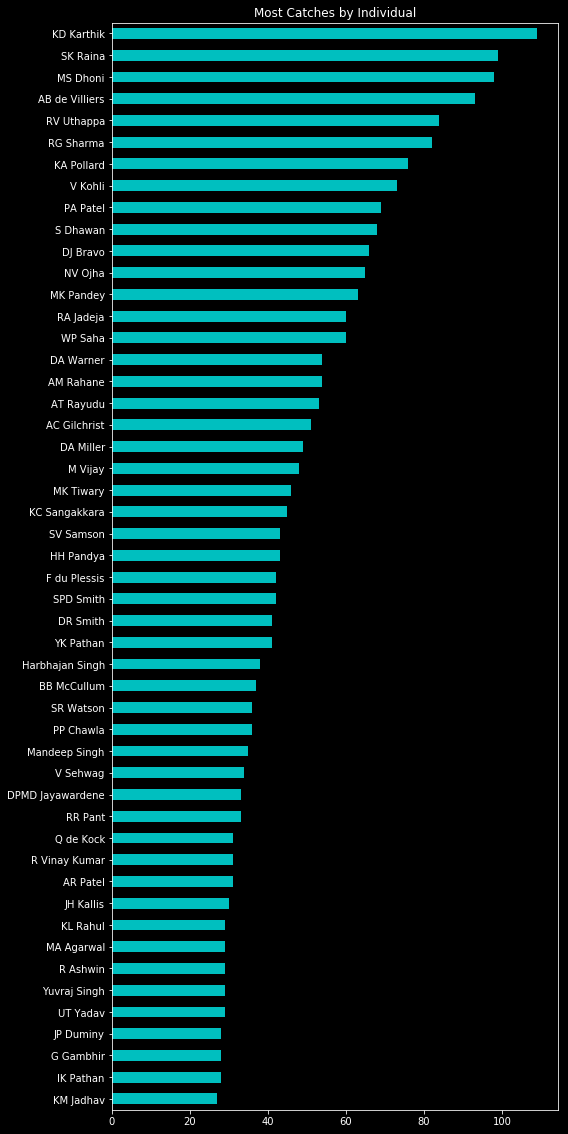

In [90]:
plt.figure(figsize=(8,20))
catches["fielder"].value_counts().sort_values().tail(50).plot(kind = "barh",color = "c")
plt.title("Most Catches by Individual")
plt.show()

## Most Catches by teams.

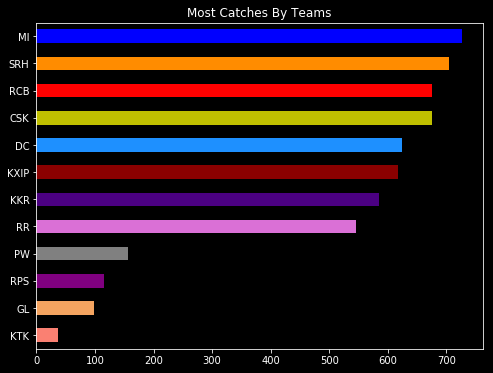

In [91]:
colors = ["salmon","sandybrown","purple","grey","orchid","indigo","darkred","dodgerblue","y","red","darkorange","b"]
plt.figure(figsize=(8,6))
catches["bowling_team"].value_counts().sort_values().tail(50).plot(kind = "barh",color = colors)
plt.title("Most Catches By Teams")
plt.show()

### Top wicket takers.

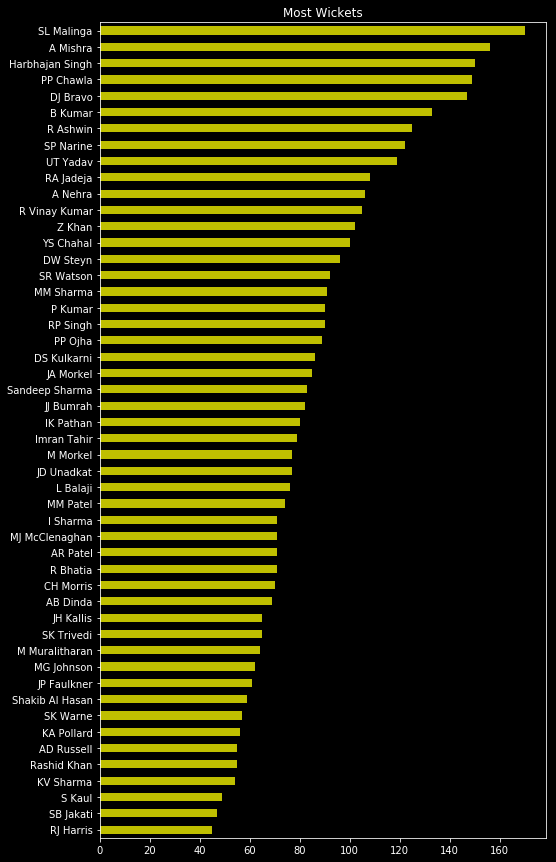

In [92]:
plt.figure(figsize=(8,15))
wickets["bowler"].value_counts().sort_values().tail(50).plot(kind = "barh",color = "y")
plt.title("Most Wickets")
plt.show()

## Total wickets by teams.

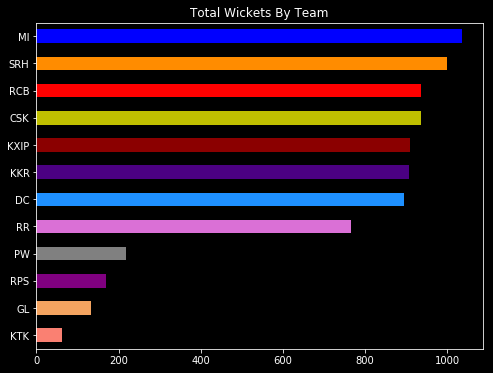

In [93]:
colors = ["salmon","sandybrown","purple","grey","orchid","dodgerblue","indigo","darkred","y","red","darkorange","b"]
plt.figure(figsize=(8,6))
wickets["bowling_team"].value_counts().sort_values().tail(50).plot(kind = "barh",color = colors)
plt.title("Total Wickets By Team")
plt.show()

## Top wicket takers for each team.

Most Wickets Taken By Particular Teams


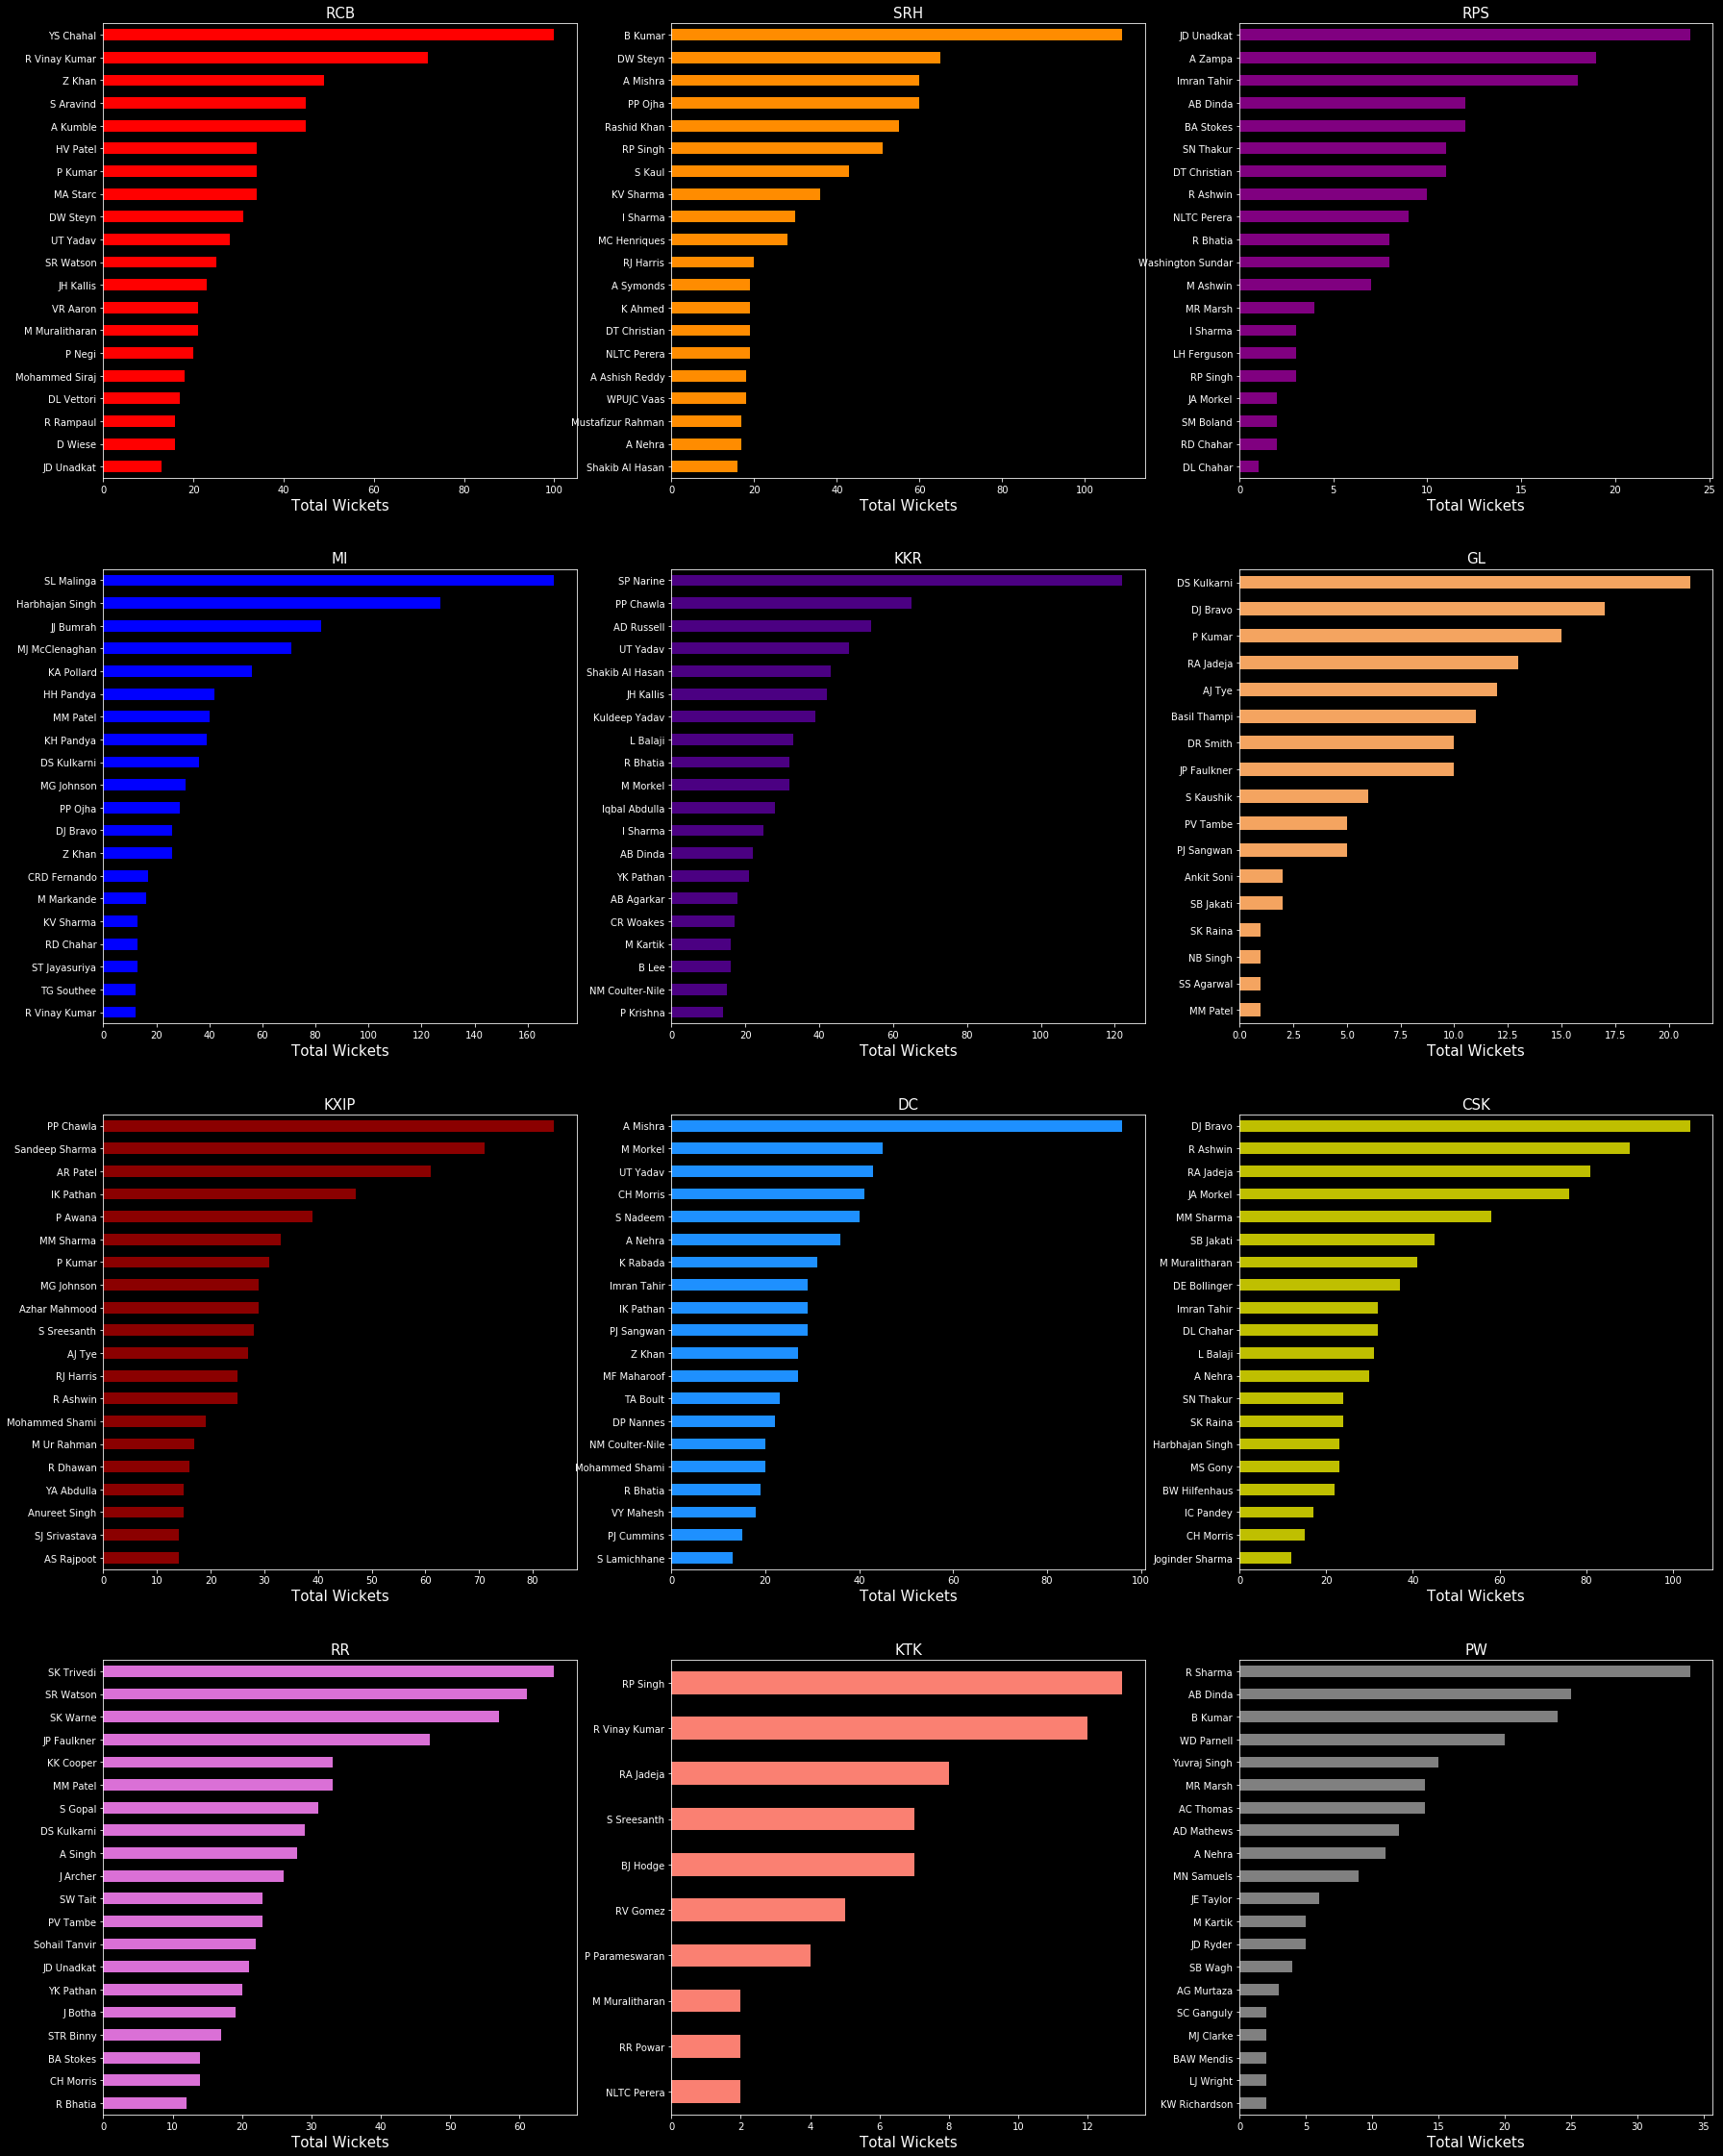

In [94]:
print("Most Wickets Taken By Particular Teams")
cl = ["r","darkorange","purple","b","indigo","sandybrown","darkred","dodgerblue","y","orchid","salmon","grey"]
x = 0
c = 1
plt.figure(figsize=(30,40))
for i in df["bowling_team"].unique():
    team = wickets[wickets["bowling_team"]==i]
    plt.subplot(4,3,c)
    team["bowler"].value_counts().sort_values().tail(20).plot(kind = "barh",color = cl[x%12])
    plt.title("{}".format(i),fontsize=15)
    plt.xlabel("Total Wickets",fontsize=15)
    c = c+1
    x = x+1

## Total wickets by each team in powerplay.

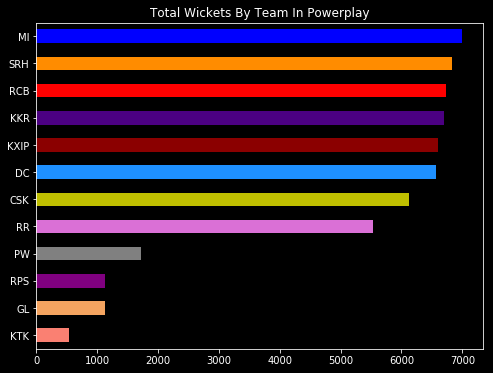

In [95]:
colors = ["salmon","sandybrown","purple","grey","orchid","y","dodgerblue","darkred","indigo","red","darkorange","b"]
plt.figure(figsize=(8,6))
powerplay["bowling_team"].value_counts().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Wickets By Team In Powerplay")
plt.show()

## Total wickets by each team in death overs.

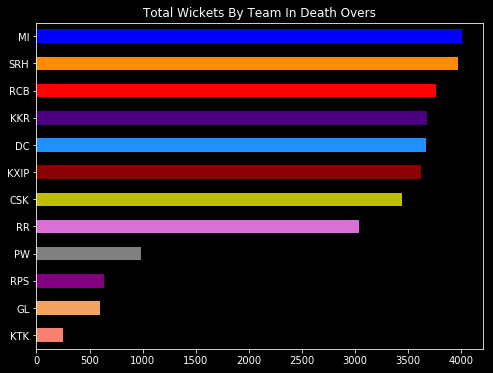

In [96]:
colors = ["salmon","sandybrown","purple","grey","orchid","y","darkred","dodgerblue","indigo","red","darkorange","b"]
plt.figure(figsize=(8,6))
death_overs["bowling_team"].value_counts().sort_values().plot(kind = "barh",color = colors)
plt.title("Total Wickets By Team In Death Overs")
plt.show()

## Most runouts by individual.

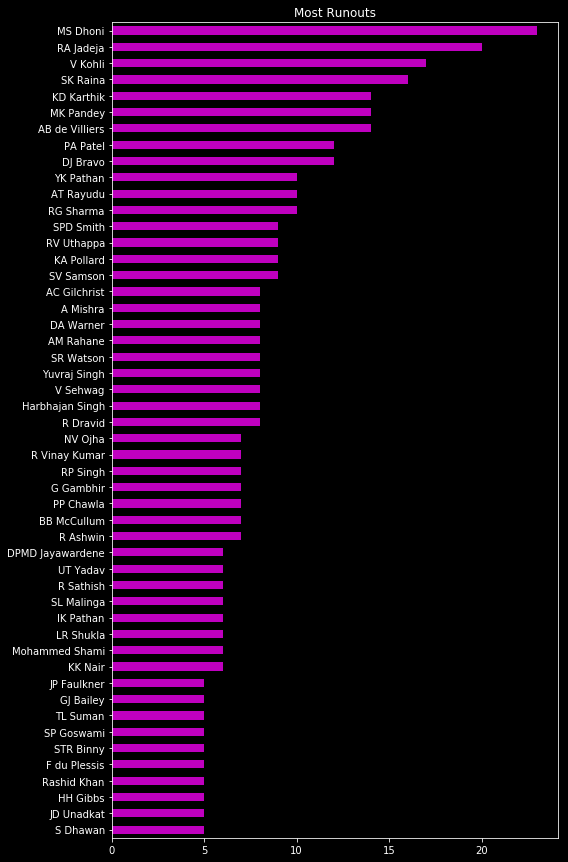

In [97]:
plt.figure(figsize=(8,15))
run_out["fielder"].value_counts().sort_values().tail(50).plot(kind = "barh",color = "m")
plt.title("Most Runouts")
plt.show()

## Most stumpings.

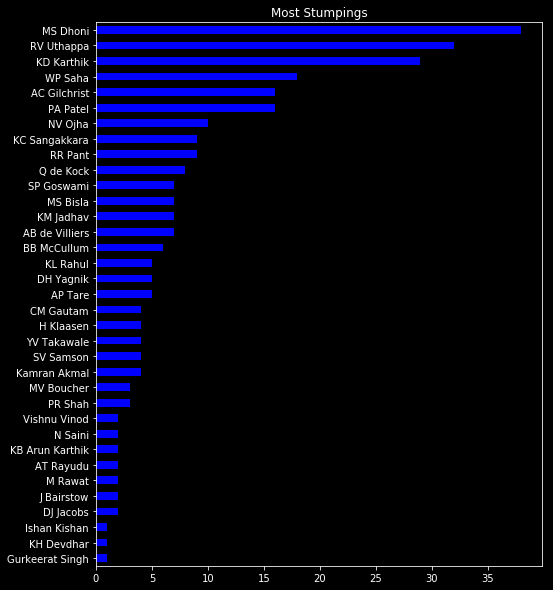

In [98]:
plt.figure(figsize=(8,10))
stumpings["fielder"].value_counts().sort_values().tail(50).plot(kind = "barh",color = "b")
plt.title("Most Stumpings")
plt.show()

## Run comparision for every over.

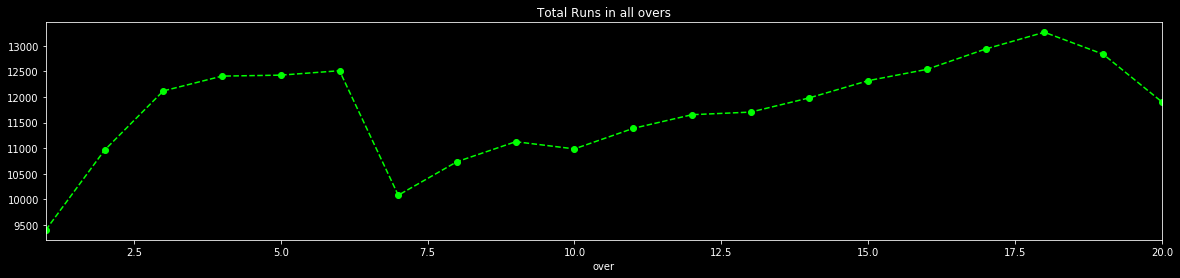

In [99]:
plt.figure(figsize=(20,4))
df["total_runs"].groupby(by=df["over"]).sum().plot(kind = "line",marker = "o",color = "lime",linestyle = "--")
plt.title("Total Runs in all overs")
plt.show()

#### From above chart it seems that the in 18th over more runs are scored while in 1st less runs are scored. 

## Total runs by each team in every over.

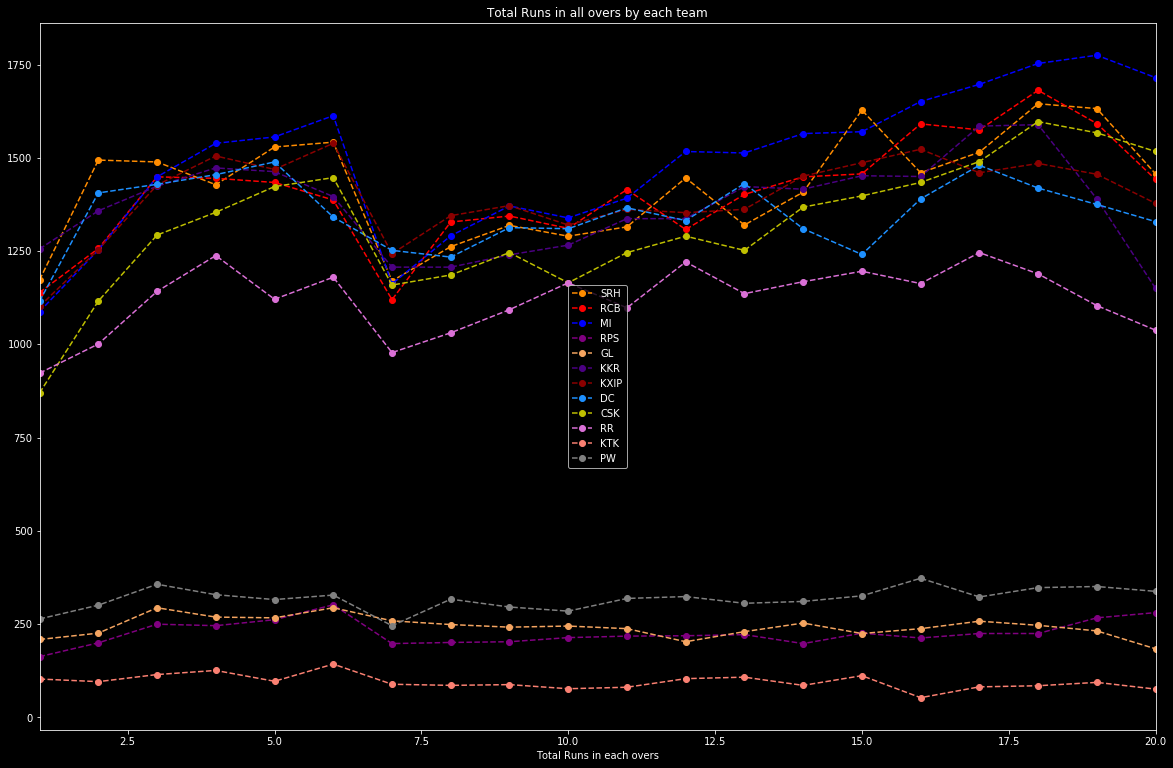

In [100]:
cl = ["darkorange","r","b","purple","sandybrown","indigo","darkred","dodgerblue","y","orchid","salmon","grey"]
x = 0
c = 1
plt.figure(figsize=(20,13))
for i in df["batting_team"].unique():
    team = df[df["batting_team"]==i]
    team["total_runs"].groupby(by=team["over"]).sum().plot(kind = "line",marker = "o",color = cl[x%12],linestyle = "--", label = i)
    plt.title("Total Runs in all overs by each team")
    plt.xlabel("Total Runs in each overs")
    plt.legend()
    c = c+1
    x = x+1

In [101]:
sixes = df[df["batsman_runs"]==6]
fours = df[df["batsman_runs"]==4]              

## Most Sixes by Individual.

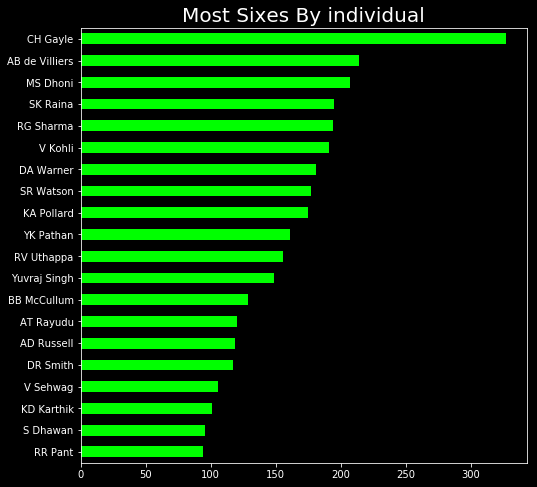

In [102]:
plt.figure(figsize=(8,8))
sixes["batsman"].value_counts().sort_values().tail(20).plot(kind = "barh",color = "lime")
plt.title("Most Sixes By individual",fontsize=20)
plt.show()

####  It is clear that Chris Galye, AB de Villiers and M S Dhoni have more power i.e. the highest six hitting capacity.

## Most Sixes By Teams.

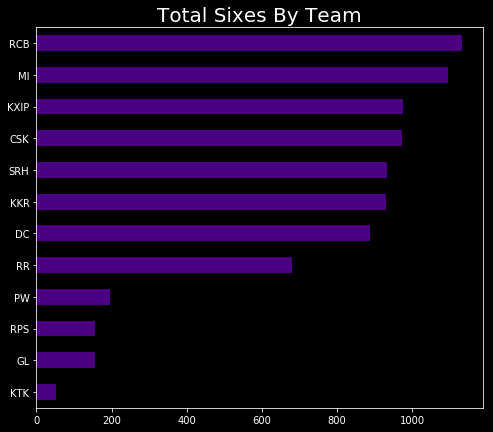

In [103]:
plt.figure(figsize=(8,7))
sixes["batting_team"].value_counts().sort_values().tail(15).plot(kind = "barh",color = "indigo")
plt.title("Total Sixes By Team",fontsize=20)
plt.show()

## Most Fours by Individuals.

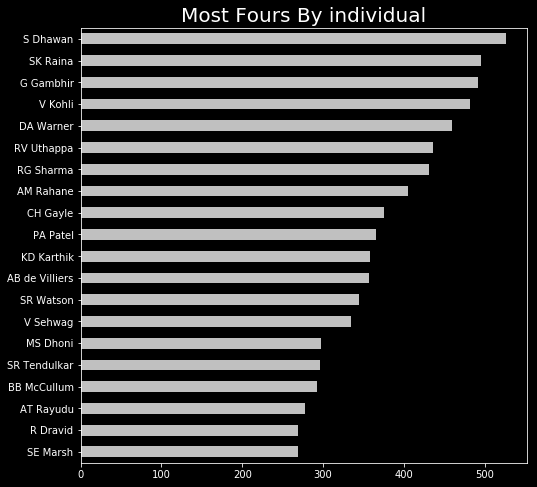

In [104]:
plt.figure(figsize=(8,8))
fours["batsman"].value_counts().sort_values().tail(20).plot(kind = "barh",color = "silver")
plt.title("Most Fours By individual",fontsize=20)
plt.show()

#### In comparision of fours left handers are leading the table. Shikhar Dhawan , Suresh Raina and Gautam Gambhir are the top three in four hitting. As we know the are best  while playing grounded shots with better placement and timing.

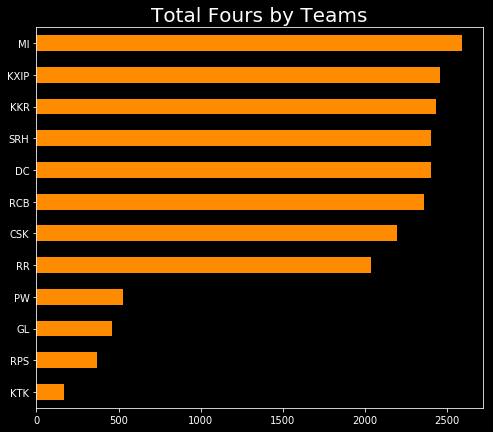

In [105]:
plt.figure(figsize=(8,7))
fours["batting_team"].value_counts().sort_values().tail(15).plot(kind = "barh",color = "darkorange")
plt.title("Total Fours by Teams",fontsize=20)
plt.show()

In [106]:
mid_overs = df.loc[(df["over"]>=7) & (df["over"]<=16)]

In [107]:
team1 = []
team2 = []
team3 = []
rr1 = []
rr2 = []
rr3 = []

for i in powerplay["batting_team"].unique():
    team = powerplay[powerplay["batting_team"]==i]
    runs = team["total_runs"].sum()
    balls = team["ball"].count()
    rr = round((runs/balls)*6,2)
    team1.append(i)
    rr1.append(rr)

for i in mid_overs["batting_team"].unique():
    team = mid_overs[mid_overs["batting_team"]==i]
    runs = team["total_runs"].sum()
    balls = team["ball"].count()
    rr = round((runs/balls)*6,2)
    team2.append(i)
    rr2.append(rr)

for i in death_overs["batting_team"].unique():
    team = death_overs[death_overs["batting_team"]==i]
    runs = team["total_runs"].sum()
    balls = team["ball"].count()
    rr = round((runs/balls)*6,2)
    team3.append(i)
    rr3.append(rr)

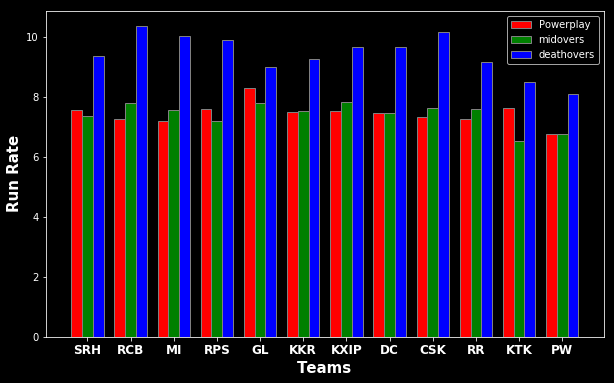

In [108]:
plt.figure(figsize=(10,6))
barWidth = 0.25
br1 = np.arange(12)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, rr1, color ='r', width = barWidth,edgecolor ='grey', label ='Powerplay')
plt.bar(br2, rr2, color ='g', width = barWidth,edgecolor ='grey', label ='midovers')
plt.bar(br3, rr3, color ='b', width = barWidth,edgecolor ='grey', label ='deathovers')

plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('Run Rate', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(12)],
        ['SRH','RCB','MI','RPS','GL','KKR','KXIP','DC','CSK','RR','KTK','PW'],fontsize=12,fontweight ='bold')
 
plt.legend()
plt.show()

#### Gl, SRH and RPS have better run rate in powerplay.
#### GL and RCB have better run rate in middle overs.
#### CSK and RCB have better run rate in death overs.

In [109]:
d = df.copy()
d = d.replace("retired hurt","other")
d = d.replace("hit wicket","other")
d = d.replace("obstructing the field","other")

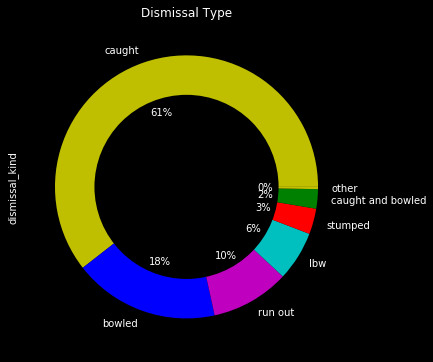

In [110]:
ax1 = plt.subplots()
d["dismissal_kind"].value_counts().plot(kind="pie",autopct='%1.0f%%',colors =("y","b","m","c","r","g"),figsize=(6,6))
plt.title("Dismissal Type")
centre_circle = plt.Circle((0,0),0.70,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()
plt.show()

#### The common way of dismissal is catching.

# THANK YOU